#Telco Customer Churn Analysis

Subject: Predicting Customer Churn in Telecommunications Sector

Our project will follow a 7-step methodology that is closely aligned with well-known frameworks used in data science projects, such as CRISP-DM, Microsoft TDSP, and KDnuggets Modern Data Science Process. The 7-steps are as follows:

1. Data Integration and Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Predictive Modelling
5. Model Evaluation
6. Explainability and Visualisation
7. Business Recommendations


## Environment Setput and Configuration

In [ ]:
# For Google Colab: Mount Google Drive

from google.colab import drive
from pathlib import Path
import os

drive.mount('/content/drive')

# Define paths
project_path = '/content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/'

data_path = project_path + '01_Data/'
notebook_path = project_path + '02_Notebooks/'
output_path = project_path + '03_Outputs/'

#Import python libraries
!pip install polars[excel]

#import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

print("Setup has been completed")

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 9.0 MB/s eta 0:00:00
Setup has been completed


## Upload Data to Dataframes


In [ ]:
demographics_df = pl.read_excel(f"{data_path}Telco_customer_churn_demographics.xlsx")
status_df      = pl.read_excel(f"{data_path}Telco_customer_churn_status.xlsx")
population_df  = pl.read_excel(f"{data_path}Telco_customer_churn_population.xlsx")
location_df    = pl.read_excel(f"{data_path}Telco_customer_churn_location.xlsx")
services_df    = pl.read_excel(f"{data_path}Telco_customer_churn_services.xlsx")

print(f"  - Demographics: {demographics_df.shape}")
print(f"  - Status: {status_df.shape}")
print(f"  - Population: {population_df.shape}")
print(f"  - Location: {location_df.shape}")
print(f"  - Services: {services_df.shape}")

print(f" *** All external files were sucessfully imported ***")

  - Demographics: (7043, 9)
  - Status: (7043, 11)
  - Population: (1671, 3)
  - Location: (7043, 9)
  - Services: (7043, 30)
 *** All external files were sucessfully imported ***


#1.Data Integration and Cleaning

**1.1 - Data Knowledge: Display schema and head rows of each dataframe**

In [ ]:
#print(f"demographics_df.schema: {demographics_df.schema}")
print("demographics_df.schema & head rows")
display(demographics_df.head(5))


demographics_df.schema & head rows


Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
str,i64,str,i64,str,str,str,str,i64
"""8779-QRDMV""",1,"""Male""",78,"""No""","""Yes""","""No""","""No""",0
"""7495-OOKFY""",1,"""Female""",74,"""No""","""Yes""","""Yes""","""Yes""",1
"""1658-BYGOY""",1,"""Male""",71,"""No""","""Yes""","""No""","""Yes""",3
"""4598-XLKNJ""",1,"""Female""",78,"""No""","""Yes""","""Yes""","""Yes""",1
"""4846-WHAFZ""",1,"""Female""",80,"""No""","""Yes""","""Yes""","""Yes""",1


In [ ]:
print("status_df.schema & head rows")
display(status_df.head(5))


status_df.schema & head rows


Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
str,i64,str,i64,str,str,i64,i64,i64,str,str
"""8779-QRDMV""",1,"""Q3""",3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data"""
"""7495-OOKFY""",1,"""Q3""",3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer"""
"""1658-BYGOY""",1,"""Q3""",2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer"""
"""4598-XLKNJ""",1,"""Q3""",2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services"""
"""4846-WHAFZ""",1,"""Q3""",2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges"""


In [ ]:

print("population_df.schema & head rows")
display(population_df.head(5))


population_df.schema & head rows


ID,Zip Code,Population
i64,i64,i64
1,90001,54492
2,90002,44586
3,90003,58198
4,90004,67852
5,90005,43019


In [ ]:
print("location_df.schema & head rows")
display(location_df.head(5))


location_df.schema & head rows


Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
str,i64,str,str,str,i64,str,f64,f64
"""8779-QRDMV""",1,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582
"""7495-OOKFY""",1,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237
"""1658-BYGOY""",1,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715
"""4598-XLKNJ""",1,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639
"""4846-WHAFZ""",1,"""United States""","""California""","""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188


In [ ]:
print("services_df.schema & head rows")
display(services_df.head(5))

services_df.schema & head rows


Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
str,i64,str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64
"""8779-QRDMV""",1,"""Q3""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65
"""7495-OOKFY""",1,"""Q3""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1
"""1658-BYGOY""",1,"""Q3""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88
"""4598-XLKNJ""",1,"""Q3""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07
"""4846-WHAFZ""",1,"""Q3""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36


**1.2 - Data Consolidation: Include all data in one dataframe**


In [ ]:
print("\n1.2 Merging datasets...")

# Start with demographics as base
df = demographics_df.clone()   #

# Merge location, services, status and population data
df = df.join(location_df, on="Customer ID", how="left", suffix="_loc")
df = df.join(services_df, on="Customer ID", how="left", suffix="_svc")
df = df.join(status_df, on="Customer ID", how="left", suffix="_sts")
df = df.join(
    population_df.select(["Zip Code", "Population"]),
    on="Zip Code",
    how="left"
)

print(f"  - Merged dataset shape: {df.shape}")



1.2 Merging datasets...
  - Merged dataset shape: (7043, 57)


In [ ]:
#print("df.schema & head rows")
display(df.head(5))

Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_loc,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Count_svc,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Count_sts,Quarter_sts,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Population
str,i64,str,i64,str,str,str,str,i64,i64,str,str,str,i64,str,f64,f64,i64,str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64
"""8779-QRDMV""",1,"""Male""",78,"""No""","""Yes""","""No""","""No""",0,1,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,1,"""Q3""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65,1,"""Q3""",3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data""",68701
"""7495-OOKFY""",1,"""Female""",74,"""No""","""Yes""","""Yes""","""Yes""",1,1,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,1,"""Q3""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1,1,"""Q3""",3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer""",55668
"""1658-BYGOY""",1,"""Male""",71,"""No""","""Yes""","""No""","""Yes""",3,1,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,1,"""Q3""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88,1,"""Q3""",2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer""",47534
"""4598-XLKNJ""",1,"""Female""",78,"""No""","""Yes""","""Yes""","""Yes""",1,1,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,1,"""Q3""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07,1,"""Q3""",2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services""",27778
"""4846-WHAFZ""",1,"""Female""",80,"""No""","""Yes""","""Yes""","""Yes""",1,1,"""United States""","""California""","""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188,1,"""Q3""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36,1,"""Q3""",2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges""",26265


**1.3 - Data Consolidation: Remove duplicated columns**

In [ ]:
print("\n1.3 Removing duplicate columns...")

# Identify columns with suffixes
cols_to_drop = [
    col for col in df.columns
    if col.endswith("_loc") or col.endswith("_svc") or col.endswith("_sts")
]

# Drop them
df = df.drop(cols_to_drop)

print(f"  - Dropped {len(cols_to_drop)} duplicate columns")
print(f"  - Final dataset shape: {df.shape}")

#print("df.schema & head rows")
display(df.head(5))



1.3 Removing duplicate columns...
  - Dropped 4 duplicate columns
  - Final dataset shape: (7043, 53)


Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Population
str,i64,str,i64,str,str,str,str,i64,str,str,str,i64,str,f64,f64,str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,i64,str,str,i64,i64,i64,str,str,i64
"""8779-QRDMV""",1,"""Male""",78,"""No""","""Yes""","""No""","""No""",0,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,"""Q3""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65,3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data""",68701
"""7495-OOKFY""",1,"""Female""",74,"""No""","""Yes""","""Yes""","""Yes""",1,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,"""Q3""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1,3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer""",55668
"""1658-BYGOY""",1,"""Male""",71,"""No""","""Yes""","""No""","""Yes""",3,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,"""Q3""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88,2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer""",47534
"""4598-XLKNJ""",1,"""Female""",78,"""No""","""Yes""","""Yes""","""Yes""",1,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,"""Q3""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07,2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services""",27778
"""4846-WHAFZ""",1,"""Female""",80,"""No""","""Yes""","""Yes""","""Yes""",1,"""United States""","""California""","""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188,"""Q3""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36,2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges""",26265


**1.4 - Data Consolidation: Check Missing Values**

In [ ]:
print("\n1.4 Checking for missing values...")

# Count missing values per column
missing_summary = (
    pl.DataFrame({
        "Column": df.columns,
        "Missing_Count": [df[col].null_count() for col in df.columns],
    })
    .with_columns([
        (pl.col("Missing_Count") / len(df) * 100)
        .round(2)
        .alias("Missing_Percentage")
    ])
    .filter(pl.col("Missing_Count") > 0)
    .sort("Missing_Count", descending=True)
)

if missing_summary.height > 0:
    print("\nColumns with missing values:")
    print(missing_summary)
else:
    print(" --- No missing values found --- ")



1.4 Checking for missing values...

Columns with missing values:
shape: (2, 3)
┌────────────────┬───────────────┬────────────────────┐
│ Column         ┆ Missing_Count ┆ Missing_Percentage │
│ ---            ┆ ---           ┆ ---                │
│ str            ┆ i64           ┆ f64                │
╞════════════════╪═══════════════╪════════════════════╡
│ Churn Category ┆ 5174          ┆ 73.46              │
│ Churn Reason   ┆ 5174          ┆ 73.46              │
└────────────────┴───────────────┴────────────────────┘


A**ttention to this:** The Churn Category and Churn Reason fields are mostly empty. This could be a limitation because these features could be important to the prediction model.

**1.5 - Data Consolidation: Save integrated dataset & Create data dictionary**

In [ ]:
print("\n1.5 Saving integrated dataset...")

# Save integrated dataset
df.write_csv(f"{output_path}telco_churn_integrated.csv")
print(f" Saved to: {output_path}telco_churn_integrated.csv")



1.5 Saving integrated dataset...
 Saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/telco_churn_integrated.csv


In [ ]:
# Create data dictionary
print(" Creating data dictionary...")

data_dict = pl.DataFrame({
    "Variable": df.columns,
    "Type": [str(dtype) for dtype in df.dtypes],
    "Non_Null_Count": [df[col].len() - df[col].null_count() for col in df.columns],
    "Unique_Values": [df[col].n_unique() for col in df.columns],
    "Sample_Values": [
        str(df[col].drop_nulls().unique().limit(3).to_list()) for col in df.columns
    ],
})

# Save dictionary
data_dict.write_csv(f"{output_path}data_dictionary.csv")
print(f" Data dictionary saved to: {output_path}data_dictionary.csv")

 Creating data dictionary...
 Data dictionary saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/data_dictionary.csv


#2.Exploratory Data Analysis

**2.1 - Target variable distribution**


2.1. Target Variable Distribution (Churn Label)...

Churn Distribution:
  - No: 5174 (73.46%)
  - Yes: 1869 (26.54%)


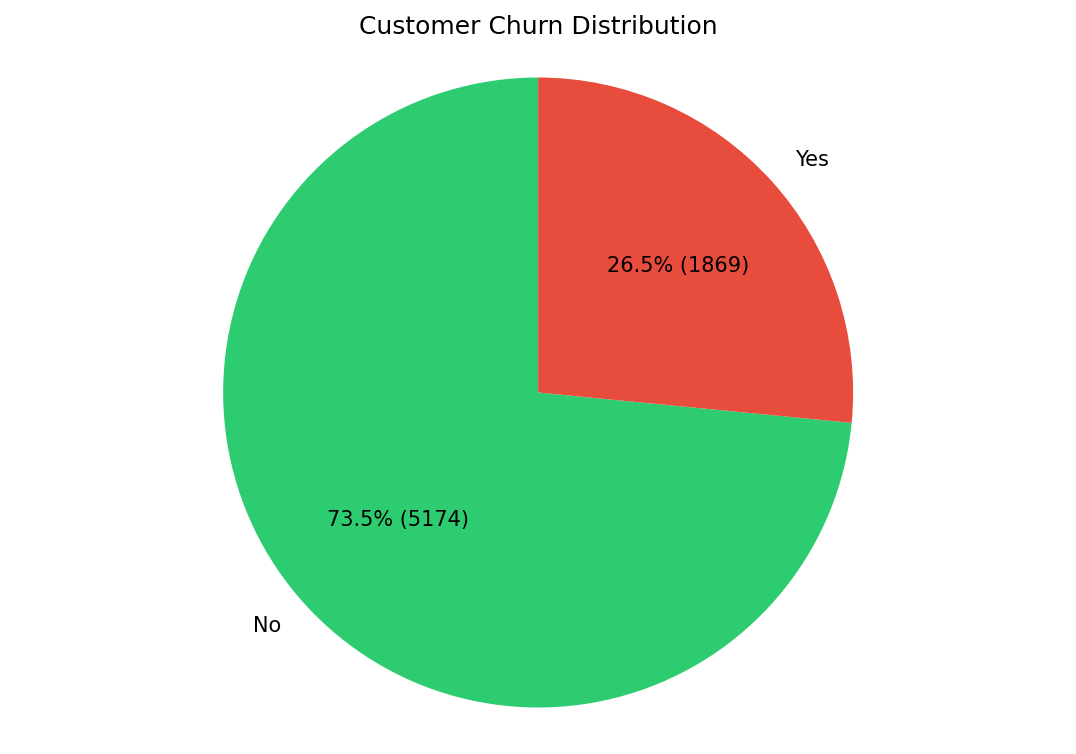

Visualization saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/churn_distribution.png


In [ ]:
import polars as pl
import matplotlib.pyplot as plt

print("\n2.1. Target Variable Distribution (Churn Label)...")

# --- Compute churn counts and percentages ---
churn_stats = (
    df.group_by("Churn Label")
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum() * 100)
          .round(2)
          .alias("Percentage")
      )
      .sort("Churn Label")
)

print("\nChurn Distribution:")
for row in churn_stats.iter_rows(named=True):
    print(f"  - {row['Churn Label']}: {row['Count']} ({row['Percentage']:.2f}%)")

# --- Save PNG with Matplotlib (no Kaleido) ---
labels = churn_stats.get_column("Churn Label").to_list()
sizes  = churn_stats.get_column("Count").to_list()
total  = sum(sizes)

fig, ax = plt.subplots(figsize=(9, 6), dpi=150)
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f"{p:.1f}% ({int(round(p*total/100))})",
    startangle=90,
    # same colors you used in Plotly:
    colors=["#2ecc71", "#e74c3c"]
)
ax.axis('equal')
ax.set_title("Customer Churn Distribution")

png_path = f"{output_path}churn_distribution.png"
fig.savefig(png_path, bbox_inches="tight")
plt.show()
plt.close(fig)

print(f"Visualization saved: {png_path}")




In churn datasets, it's very common to see something like Non-Churn (70-90%), Churn (10-30%), this is the classical annual customer behaviour. In our case we have a dataset with Churn equal to 26,5% so, yes our dataset is inbalanced but this should not be an issue if correctly adressed in the predict models that we will use.

**Gradient boosting (XGBoost):** Very robust to imbalance because:

*   Optimize log-loss, not accuracy.
*   Implicitly weight misclassifications more on the minority class.
*   Split trees based on information gain, which is sensitive to minority classes.   

In practice XGBoost behaves well up to 1:20 imbalance without any intervention.
our dataset is very close (around 1:3 or 1:4 imbalance).

**Random Forest and Logistic Regression:** We can use hiper_parameter "'class_weight = 'balanced'" and "Threshold tuning". Because the imbalance level in our dataset is not extreme this should be enough to use those models  with confidence on the results. To optimize the classification threshold we will not use the default value of 0.5, instead after some simulations we decided to use a threshold between 0.30 and 0.45.

In this kind of problems the real issue is not imbalance, the real issues for the companies are it's thresholds and the business cost. In fact, in churn, the cost of predictions is asymmetric and, due to that, the focus should stay on:

**False Negative (churner predicted as non-churn):** Which implies loss of customer lifetime value

**False Positive ():** Spend money and resources on unnecessary retention campaign's.


**2.2 - Descritive Statistics**

In [ ]:
print("\n2.2 Descriptive Statistics for Numerical Variables...")

# Select only numeric columns
numerical_cols = [
    col for col, dtype in df.schema.items()
    if dtype in (pl.Int8, pl.Int16, pl.Int32, pl.Int64,
                 pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64,
                 pl.Float32, pl.Float64)
]

desc_stats = df.select(numerical_cols).describe()
display(desc_stats)

# Save to CSV
desc_stats.write_csv(f"{output_path}descriptive_statistics.csv")

print(f"Descriptive Statistics saved to: {output_path}descriptive_statistics.csv")



2.2 Descriptive Statistics for Numerical Variables...


statistic,Count,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,Population
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.0,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.26537,58.50504,4400.295755,22139.603294
"""std""",0.0,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,15.448113,20.41894,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152,21152.392837
"""min""",1.0,19.0,0.0,90001.0,32.555828,-124.301372,0.0,1.0,0.0,0.0,18.25,18.8,0.0,0.0,0.0,21.36,1.0,0.0,5.0,2003.0,11.0
"""25%""",1.0,32.0,0.0,92101.0,33.990646,-121.78809,0.0,9.0,9.21,3.0,35.5,400.3,0.0,0.0,70.59,605.75,3.0,0.0,40.0,3469.0,2344.0
"""50%""",1.0,46.0,0.0,93518.0,36.205465,-119.595293,0.0,29.0,22.89,17.0,70.35,1394.55,0.0,0.0,401.44,2108.64,3.0,0.0,61.0,4527.0,17554.0
"""75%""",1.0,60.0,0.0,95329.0,38.161321,-117.969795,3.0,55.0,36.4,27.0,89.85,3789.2,0.0,0.0,1191.5,4801.93,4.0,1.0,76.0,5381.0,36125.0
"""max""",1.0,80.0,9.0,96150.0,41.962127,-114.192901,11.0,72.0,49.99,85.0,118.75,8684.8,49.79,150.0,3564.72,11979.34,5.0,1.0,96.0,6500.0,105285.0


Descriptive Statistics saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/descriptive_statistics.csv


**2.3 - Analysing Churn by demographic variables**

In [ ]:
def ensure_no_yes_order(df, id_col):
    desired_order = [id_col, "No", "Yes"]
    return df.select([c for c in desired_order if c in df.columns])

# By Gender ********************
gender_churn = (
    df.group_by(["Gender", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Gender") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Gender",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Gender")
)

print("\nChurn Rate by Gender (%):")
gender_churn = ensure_no_yes_order(gender_churn, "Gender")
print(gender_churn)



Churn Rate by Gender (%):
shape: (2, 3)
┌────────┬───────┬───────┐
│ Gender ┆ No    ┆ Yes   │
│ ---    ┆ ---   ┆ ---   │
│ str    ┆ f64   ┆ f64   │
╞════════╪═══════╪═══════╡
│ Female ┆ 73.08 ┆ 26.92 │
│ Male   ┆ 73.84 ┆ 26.16 │
└────────┴───────┴───────┘


In [ ]:
# By Group Age ***************
df = df.with_columns(
    pl.when(pl.col("Age") <= 30).then(pl.lit("<30"))
     .when(pl.col("Age") <= 50).then(pl.lit("30-50"))
     .when(pl.col("Age") <= 65).then(pl.lit("50-65"))
     .otherwise(pl.lit("65+"))
     .alias("Age_Group")
)

age_churn = (
    df.group_by(["Age_Group", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Age_Group") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Age_Group",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Age_Group")
)

print("\nChurn Rate by Group Age (%):")
age_churn = ensure_no_yes_order(age_churn, "Age_Group")
print(age_churn)


Churn Rate by Group Age (%):
shape: (4, 3)
┌───────────┬───────┬───────┐
│ Age_Group ┆ No    ┆ Yes   │
│ ---       ┆ ---   ┆ ---   │
│ str       ┆ f64   ┆ f64   │
╞═══════════╪═══════╪═══════╡
│ 30-50     ┆ 76.46 ┆ 23.54 │
│ 50-65     ┆ 74.61 ┆ 25.39 │
│ 65+       ┆ 58.14 ┆ 41.86 │
│ <30       ┆ 77.63 ┆ 22.37 │
└───────────┴───────┴───────┘


In [ ]:
# Senior Citizen *********************
senior_churn = (
    df.group_by(["Senior Citizen", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Senior Citizen") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Senior Citizen",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Senior Citizen")
)

print("\nChurn Rate by Senior Citizen (%):")
senior_churn = ensure_no_yes_order(senior_churn, "Senior Citizen")
print(senior_churn)


Churn Rate by Senior Citizen (%):
shape: (2, 3)
┌────────────────┬───────┬───────┐
│ Senior Citizen ┆ No    ┆ Yes   │
│ ---            ┆ ---   ┆ ---   │
│ str            ┆ f64   ┆ f64   │
╞════════════════╪═══════╪═══════╡
│ No             ┆ 76.39 ┆ 23.61 │
│ Yes            ┆ 58.32 ┆ 41.68 │
└────────────────┴───────┴───────┘


In [ ]:
# By Marital Status ***************
married_churn = (
    df.group_by(["Married", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Married") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Married",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Married")
)

print("\nChurn Rate by Marital Status (%):")
married_churn = ensure_no_yes_order(married_churn, "Married")
print(married_churn)



Churn Rate by Marital Status (%):
shape: (2, 3)
┌─────────┬───────┬───────┐
│ Married ┆ No    ┆ Yes   │
│ ---     ┆ ---   ┆ ---   │
│ str     ┆ f64   ┆ f64   │
╞═════════╪═══════╪═══════╡
│ No      ┆ 67.04 ┆ 32.96 │
│ Yes     ┆ 80.34 ┆ 19.66 │
└─────────┴───────┴───────┘


**2.4 - Analysing Churn by service variables**

In [ ]:
print("\n2.4 Churn Analysis by Services...")

# --- Contract Type ---
contract_churn = (
    df.group_by(["Contract", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Contract") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(values="Percentage", index="Contract", columns="Churn Label")
      .fill_null(0)
      .sort("Contract")
)

print("\nChurn Rate by Contract Type (%):")
contract_churn  = ensure_no_yes_order(contract_churn,  "Contract")
print(contract_churn)


# --- Internet Type ---
internet_churn = (
    df.group_by(["Internet Type", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Internet Type") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(values="Percentage", index="Internet Type", columns="Churn Label")
      .fill_null(0)
      .sort("Internet Type")
)

print("\nChurn Rate by Internet Type (%):")
internet_churn  = ensure_no_yes_order(internet_churn,  "Internet Type")
print(internet_churn)


# --- Payment Method ---
payment_churn = (
    df.group_by(["Payment Method", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Payment Method") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(values="Percentage", index="Payment Method", columns="Churn Label")
      .fill_null(0)
      .sort("Payment Method")
)

print("\nChurn Rate by Payment Method (%):")
payment_churn   = ensure_no_yes_order(payment_churn,   "Payment Method")
print(payment_churn)



2.4 Churn Analysis by Services...

Churn Rate by Contract Type (%):
shape: (3, 3)
┌────────────────┬───────┬───────┐
│ Contract       ┆ No    ┆ Yes   │
│ ---            ┆ ---   ┆ ---   │
│ str            ┆ f64   ┆ f64   │
╞════════════════╪═══════╪═══════╡
│ Month-to-Month ┆ 54.16 ┆ 45.84 │
│ One Year       ┆ 89.29 ┆ 10.71 │
│ Two Year       ┆ 97.45 ┆ 2.55  │
└────────────────┴───────┴───────┘

Churn Rate by Internet Type (%):
shape: (4, 3)
┌───────────────┬───────┬───────┐
│ Internet Type ┆ No    ┆ Yes   │
│ ---           ┆ ---   ┆ ---   │
│ str           ┆ f64   ┆ f64   │
╞═══════════════╪═══════╪═══════╡
│ Cable         ┆ 74.34 ┆ 25.66 │
│ DSL           ┆ 81.42 ┆ 18.58 │
│ Fiber Optic   ┆ 59.28 ┆ 40.72 │
│ None          ┆ 92.6  ┆ 7.4   │
└───────────────┴───────┴───────┘

Churn Rate by Payment Method (%):
shape: (3, 3)
┌─────────────────┬───────┬───────┐
│ Payment Method  ┆ No    ┆ Yes   │
│ ---             ┆ ---   ┆ ---   │
│ str             ┆ f64   ┆ f64   │
╞═════════════════╪══

**2.5 - Analysing Churn by tenure**

In [ ]:
print("\n2.5. Churn Analysis by Tenure...")

# Create tenure group
df = df.with_columns(
    pl.when(pl.col("Tenure in Months") <= 12).then(pl.lit("0-12m"))
     .when(pl.col("Tenure in Months") <= 24).then(pl.lit("12-24m"))
     .when(pl.col("Tenure in Months") <= 48).then(pl.lit("24-48m"))
     .otherwise(pl.lit("48m+"))
     .alias("Tenure_Group")
)

# Crosstab equivalent
tenure_churn = (
    df.group_by(["Tenure_Group", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Tenure_Group") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Tenure_Group",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Tenure_Group")
)

print("\nChurn Rate by Tenure Group (%):")
tenure_churn = ensure_no_yes_order(tenure_churn, "Tenure_Group")
print(tenure_churn)



2.5. Churn Analysis by Tenure...

Churn Rate by Tenure Group (%):
shape: (4, 3)
┌──────────────┬───────┬───────┐
│ Tenure_Group ┆ No    ┆ Yes   │
│ ---          ┆ ---   ┆ ---   │
│ str          ┆ f64   ┆ f64   │
╞══════════════╪═══════╪═══════╡
│ 0-12m        ┆ 52.56 ┆ 47.44 │
│ 12-24m       ┆ 71.29 ┆ 28.71 │
│ 24-48m       ┆ 79.61 ┆ 20.39 │
│ 48m+         ┆ 90.49 ┆ 9.51  │
└──────────────┴───────┴───────┘


**2.6 - Financial metrics analysis**

In [ ]:
print("\n2.6. Financial Metrics Analysis...")

financial_cols = ["Monthly Charge", "Total Revenue", "CLTV", "Total Charges"]

# Compute averages by churn label
financial_by_churn = (
    df.group_by("Churn Label")
      .agg([pl.col(c).mean().alias(c) for c in financial_cols])
      .sort("Churn Label")
)

print("\nAverage Financial Metrics by Churn:")
print(financial_by_churn)



2.6. Financial Metrics Analysis...

Average Financial Metrics by Churn:
shape: (2, 5)
┌─────────────┬────────────────┬───────────────┬─────────────┬───────────────┐
│ Churn Label ┆ Monthly Charge ┆ Total Revenue ┆ CLTV        ┆ Total Charges │
│ ---         ┆ ---            ┆ ---           ┆ ---         ┆ ---           │
│ str         ┆ f64            ┆ f64           ┆ f64         ┆ f64           │
╞═════════════╪════════════════╪═══════════════╪═════════════╪═══════════════╡
│ No          ┆ 61.265124      ┆ 3418.374927   ┆ 4490.921337 ┆ 2550.792103   │
│ Yes         ┆ 74.441332      ┆ 1971.353569   ┆ 4149.41466  ┆ 1531.796094   │
└─────────────┴────────────────┴───────────────┴─────────────┴───────────────┘


**2.7 - Correlation analysis**


We discuss the use of Pearson's or Spearman Correlation methods.

Pearsons works well when: Variables are continuous; Relationships are linear; There are no extreme outliers, and; Data is approximately normal distribution.

Spearman works better if its necessary: To handle nonlinear but monotonic (the direction of change is consistent, even if the rate of change is not) patterns; Outliers; Work with ordinal, categorical encoded, or skewed variables, or; Capture effects like "high-Medium-Low" that are not linearly spaced.

As could be confirmed if both correlations are computed, Spearman gives stronger signal in churn datasets because:

1.   **Many relationships are monotonic, not linear: **

    *   Tenure ↓ -> Churn ↑
    *   MonthlyCharges ↑ -> Churn ↑
    *   Number of add-on services ↑ -> Churn ↓
    *   Payment method (e.g., electronic check) -> higher churn but not linearly spaced  

These patterns are directional, but not linear and **Spearman captures directions but Pearson's** do not.

2.   **Many variables in the dataset are ordinal disguised as numeric:**

    *   Tenure in Months
    *   Age
    *   Number of tickets
    *   Number of services
    *   Billing methods
    *   Contract type (encoded as 0/1/2)

**Pearson** treats the spacing as equal intervals, which is false. **Spearman** ignores the spacing and only cares about the order.

3.   **Churn is a binary variable:** Correlations with binary variables often violate Pearson assumptions. Spearman handles binary targets better because ranks are more meaningful.

4.   **Strong skewness and long tails:** Our dataset has variables like:

    *   MonthlyCharges
    *   TotalCharges
    *   Revenue
    *   Tenure

The distribution of these variables are not symmetric and contain outliers. Both characteristics that are bad for Pearson.

For educational purposes, we kept the Pearson correlation code in the notebook, commented out. Running it allows an immediate comparison and confirms that the values are broadly aligned with those obtained using Spearman. However, as expected, Spearman provides a more robust and meaningful measure of association in this dataset, as it better captures the monotonic patterns typical of churn-related variables.

In [ ]:
"""
# Select numerical columns for correlation
corr_cols = [
    "Age", "Tenure in Months", "Monthly Charge", "Total Revenue", "CLTV",
    "Satisfaction Score", "Churn Score", "Number of Referrals",
    "Avg Monthly GB Download", "Population"
]

# Compute Pearson's correlation matrix
corr_matrix = df.select(corr_cols).corr()

# Display correlation matrix
print("\nPearson's Correlation Matrix:")
print(corr_matrix)

# Save to CSV
corr_file = f"{output_path}Pearsons_correlation_matrix.csv"
corr_matrix.write_csv(corr_file)
print(f"\nPearson's Correlation matrix saved: {corr_file}")

"""

'\n# Select numerical columns for correlation\ncorr_cols = [\n    "Age", "Tenure in Months", "Monthly Charge", "Total Revenue", "CLTV",\n    "Satisfaction Score", "Churn Score", "Number of Referrals",\n    "Avg Monthly GB Download", "Population"\n]\n\n# Compute Pearson\'s correlation matrix\ncorr_matrix = df.select(corr_cols).corr()\n\n# Display correlation matrix\nprint("\nPearson\'s Correlation Matrix:")\nprint(corr_matrix)\n\n# Save to CSV\ncorr_file = f"{output_path}Pearsons_correlation_matrix.csv"\ncorr_matrix.write_csv(corr_file)\nprint(f"\nPearson\'s Correlation matrix saved: {corr_file}")\n\n'

**Heat Map: Visualize correlation matrix**


In [ ]:
"""
# corr_matrix is a Polars DataFrame from: corr_matrix = df.select(corr_cols).corr()

# 1) Extract variable names from Polars'
if "column" in corr_matrix.columns:
    names = corr_matrix.get_column("column").to_list()
    vals_pl = corr_matrix.drop("column")
else:
    names = corr_cols
    vals_pl = corr_matrix

# 2) Convert values to pandas and set both axes labels
corr_pd = vals_pl.to_pandas()
corr_pd.index = names
corr_pd.columns = names

# 3) Display the heat map
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_pd.astype(float),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
)
plt.title("Pearson's Correlation Matrix of Numerical Variables", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Show and save
plt.show()
heatmap_path = f"{output_path}Pearson's correlation_heatmap.png"
plt.savefig(heatmap_path, dpi=300, bbox_inches="tight")
print(f"Pearson's Correlation heatmap displayed and saved: {heatmap_path}")

"""


'\n# corr_matrix is a Polars DataFrame from: corr_matrix = df.select(corr_cols).corr()\n\n# 1) Extract variable names from Polars\'\nif "column" in corr_matrix.columns:\n    names = corr_matrix.get_column("column").to_list()\n    vals_pl = corr_matrix.drop("column")\nelse:\n    names = corr_cols\n    vals_pl = corr_matrix\n\n# 2) Convert values to pandas and set both axes labels\ncorr_pd = vals_pl.to_pandas()\ncorr_pd.index = names\ncorr_pd.columns = names\n\n# 3) Display the heat map\nplt.figure(figsize=(12, 10))\nsns.heatmap(\n    corr_pd.astype(float),\n    annot=True,\n    fmt=".2f",\n    cmap="coolwarm",\n    center=0,\n    square=True,\n    linewidths=1,\n    cbar_kws={"shrink": 0.8},\n)\nplt.title("Pearson\'s Correlation Matrix of Numerical Variables", fontsize=16, fontweight="bold")\nplt.xticks(rotation=45, ha="right")\nplt.yticks(rotation=0)\nplt.tight_layout()\n\n# Show and save\nplt.show()\nheatmap_path = f"{output_path}Pearson\'s correlation_heatmap.png"\nplt.savefig(heatma


2.2. Spearman Correlation Heatmap...


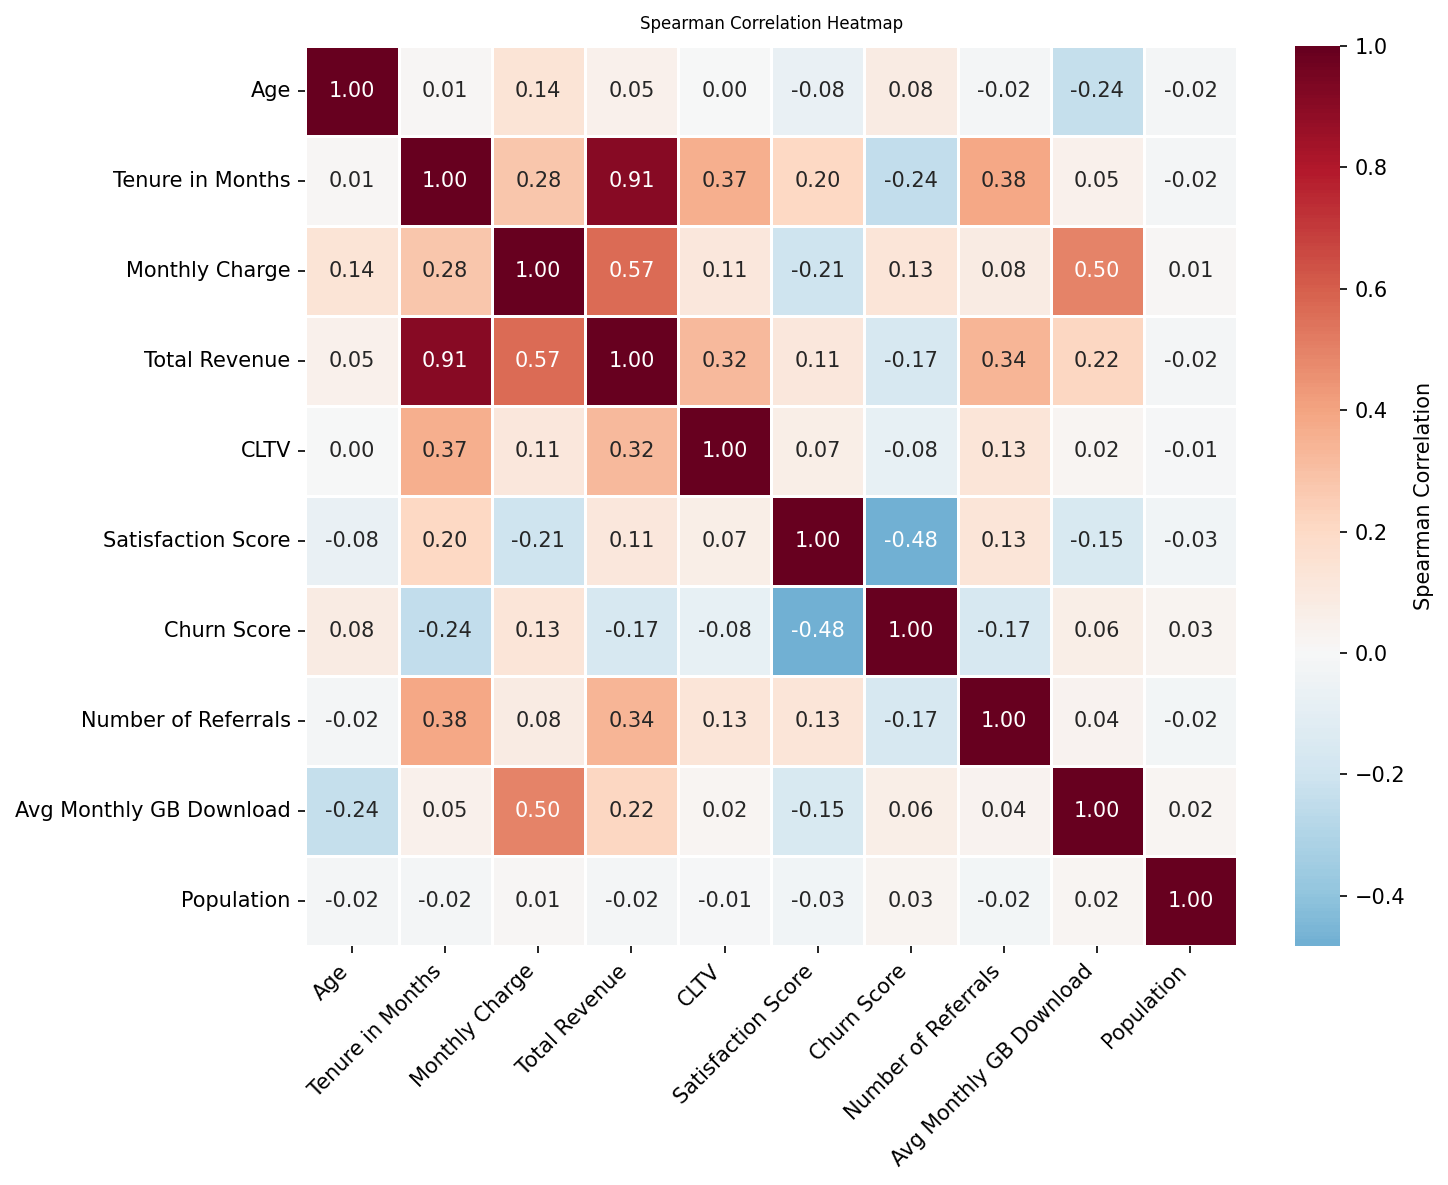

Spearman heatmap saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/Spearman_correlation_heatmap.png


<Figure size 640x480 with 0 Axes>

In [ ]:
print("\n2.2. Spearman Correlation Heatmap...")

# --- Select numerical columns for correlation ---
corr_cols = [
    "Age", "Tenure in Months", "Monthly Charge", "Total Revenue", "CLTV",
    "Satisfaction Score", "Churn Score", "Number of Referrals",
    "Avg Monthly GB Download", "Population"
]

# --- Convert to pandas and compute Spearman correlation ---
df_pd = df.select(corr_cols).to_pandas()
corr_matrix = df_pd.corr(method="spearman").round(3)

# --- Create heatmap ---
plt.figure(figsize=(10, 8), dpi=150)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    linewidths=0.5,
    cbar_kws={"label": "Spearman Correlation"}
)

plt.title("Spearman Correlation Heatmap", fontsize=8, pad=8)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# --- Show heatmap on screen ---
plt.show()

# --- Save as PNG ---
png_path = f"{output_path}Spearman_correlation_heatmap.png"
plt.savefig(png_path, bbox_inches="tight")
print(f"Spearman heatmap saved: {png_path}")



**2.8 - Geographic analysis**  Not relevant because only one country (EUA), and one state (California) is present on the dataset. We maintain geographic analysis using city but, even so, small cities with a small number of customers apears in the top ten.

In [ ]:
geo_churn = (
    df.group_by("City")
      .agg([
          pl.count("Customer ID").alias("Total_Customers"),
          (pl.col("Churn Label") == "Yes").sum().alias("Churned_Customers")
      ])
      .with_columns(
          ((pl.col("Churned_Customers") / pl.col("Total_Customers")) * 100)
          .round(2)
          .alias("Churn_Rate")
      )
      .sort("Churn_Rate", descending=True)
)

# Save to CSV
geo_churn.write_csv(f"{output_path}churn_by_city.csv")
print(f"  ✓ Geographic churn analysis saved: {output_path}churn_by_city.csv")

# Show top 10 Cities
print("\nTop 10 Cities by Churn Rate:")
print(geo_churn.head(10))


  ✓ Geographic churn analysis saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/churn_by_city.csv

Top 10 Cities by Churn Rate:
shape: (10, 4)
┌──────────────────┬─────────────────┬───────────────────┬────────────┐
│ City             ┆ Total_Customers ┆ Churned_Customers ┆ Churn_Rate │
│ ---              ┆ ---             ┆ ---               ┆ ---        │
│ str              ┆ u32             ┆ u32               ┆ f64        │
╞══════════════════╪═════════════════╪═══════════════════╪════════════╡
│ Johannesburg     ┆ 2               ┆ 2                 ┆ 100.0      │
│ Eldridge         ┆ 2               ┆ 2                 ┆ 100.0      │
│ Smith River      ┆ 4               ┆ 4                 ┆ 100.0      │
│ South Lake Tahoe ┆ 2               ┆ 2                 ┆ 100.0      │
│ Boulder Creek    ┆ 4               ┆ 4                 ┆ 100.0      │
│ Twain            ┆ 4               ┆ 4                 ┆ 100.0      │
│ Wrightwood       ┆ 4       

#3. FEATURE ENGINEERING

**3.1 - Creating Composite Features**

Based on our project goals and the data analysis from previous sections, we will now create the following composite features.

3.1.1 - Customer Longevity Ratio  
3.1.2 - Average Monthly Spend  
3.1.3 - Service Bundle Complexity Index  
3.1.4 - Revenue per Service  
3.1.5 - Has Dependents (binary)  
3.1.6 - Is Heavy User (based on data download)  
3.1.7 - CLTV per Month  
3.1.8 - Has Premium Services  
3.1.9 - Streaming Services Count  
3.1.10 - Contract Value (encoding contract types)    
3.1.11 - Customer Engagement Score (composite)  
3.1.12 - Population Density Category  

  
The code provides detailed information about each feature, including the formula used to calculate each one.

In [ ]:
print("\n3.1. Creating new features...\n")
df_fe = df.clone()

#3.1.1 - Customer Longevity Ratio
df_fe = df_fe.with_columns(
    (pl.col("Tenure in Months") / pl.col("Age")).alias("Longevity_Ratio")
)

print("** Longevity_Ratio (Tenure / Age): Done ** ")

#3.1.2 - Average Monthly Spend
df_fe = df_fe.with_columns(
    (pl.col("Total Revenue") / (pl.col("Tenure in Months") + 1))
    .alias("Avg_Monthly_Spend")
)

print("** Avg_Monthly_Spend (Total Revenue / Tenure): Done ** ")

# 3.1.3 - Service Bundle Complexity Index
service_cols = [
    "Phone Service", "Internet Service", "Online Security", "Online Backup",
    "Device Protection Plan", "Premium Tech Support", "Streaming TV",
    "Streaming Movies", "Streaming Music", "Unlimited Data"
]

df_fe = df_fe.with_columns(
    pl.sum_horizontal([
        (pl.col(c) == "Yes").cast(pl.Int8) for c in service_cols
    ]).alias("Service_Bundle_Count")
)

print("** Service_Bundle_Count (Number of services subscribed): Done ** ")

# 3.1.4 - Revenue per Service
df_fe = df_fe.with_columns(
    (pl.col("Total Revenue") / (pl.col("Service_Bundle_Count") + 1))
    .alias("Revenue_per_Service")
)

print("** Revenue_per_Service (Total Revenue / Service Count): Done ** ")

# 3.1.5 - Has Dependents (binary)
df_fe = df_fe.with_columns(
    (pl.col("Number of Dependents") > 0)
    .cast(pl.Int8)
    .alias("Has_Dependents")
)

print("** Has_Dependents (Binary indicator): Done ** ")

# 3.1.6 - Is an Heavy User (based on data download)
median_download = df_fe.select(pl.col("Avg Monthly GB Download").median()).item()

df_fe = df_fe.with_columns(
    (pl.col("Avg Monthly GB Download") > median_download)
    .cast(pl.Int8)
    .alias("Is_Heavy_User")
)

print("** Is_Heavy_User (Above median data usage): Done ** ")

# 3.1.7 - CLTV per Month
"""
Customer Lifetime Value (CLTV) represents the total revenue (or profit)
a company expects to earn from a customer per month
"""
df_fe = df_fe.with_columns(
    (pl.col("CLTV") / (pl.col("Tenure in Months") + 1))
    .alias("CLTV_per_Month")
)

print("** CLTV_per_Month (CLTV / Tenure): Done ** ")

# 3.1.8 - Has Premium Services
premium_services = [
    "Online Security", "Online Backup",
    "Device Protection Plan", "Premium Tech Support"
]

df_fe = df_fe.with_columns(
    pl.any_horizontal([
        (pl.col(c) == "Yes") for c in premium_services
    ]).cast(pl.Int8).alias("Has_Premium_Services")
)

print("** Has_Premium_Services (Any premium service): Done ** ")

# 3.1.9 - Streaming Services Count
streaming_cols = ["Streaming TV", "Streaming Movies", "Streaming Music"]

df_fe = df_fe.with_columns(
    pl.sum_horizontal([
        (pl.col(c) == "Yes").cast(pl.Int8) for c in streaming_cols
    ]).alias("Streaming_Count")
)

print("** Streaming_Count (Number of streaming services): Done ** ")

# 3.1.10 - Contract Value (encoding contract types)
contract_value_map = {"Month-to-Month": 1, "One Year": 12, "Two Year": 24}

df_fe = df_fe.with_columns(
    pl.col("Contract")
    .replace(contract_value_map)
    .cast(pl.Int8)
    .alias("Contract_Value")
)

print("** Contract Value (encoding contract types): Done ** ")

# 3.1.11 - Customer Engagement Score (a kind of fidelization score)
tenure_max = df_fe.select(pl.col("Tenure in Months").max()).item()
referrals_max = df_fe.select(pl.col("Number of Referrals").max()).item()
services_max = df_fe.select(pl.col("Service_Bundle_Count").max()).item()
contract_max  = df_fe.select(pl.col("Contract_Value").max()).item()

df_fe = df_fe.with_columns(
    (
        (pl.col("Tenure in Months") / tenure_max) * 0.3 +
        (pl.col("Number of Referrals") / (referrals_max + 1)) * 0.2 +
        (pl.col("Service_Bundle_Count") / services_max) * 0.3 +
        (pl.col("Contract_Value") / contract_max)       * 0.2
    ).alias("Engagement_Score")
)

print("** Customer Engagement Score: Done ** ")

# 3.1.12 - Population Density Category
df_fe = df_fe.with_columns(
    pl.when((pl.col("Population") > 0) & (pl.col("Population") <= 30_000)).then(pl.lit("Low"))
     .when((pl.col("Population") > 30_000) & (pl.col("Population") <= 50_000)).then(pl.lit("Medium"))
     .when((pl.col("Population") > 50_000) & (pl.col("Population") <= 100_000)).then(pl.lit("High"))
     .otherwise(pl.lit(None))
     .cast(pl.Utf8)  # or .cast(pl.Categorical)
     .alias("Population_Density")
)

print("** Population_Density (Categorical): Done ** ")

#Save dataset with new features
print("\nSaving dataset with new features...\n")
df_fe.write_csv(output_path + "telco_churn_features.csv")

print(f"Dataset with new feature saved to: {output_path}telco_churn_features.csv")




3.1. Creating new features...

** Longevity_Ratio (Tenure / Age): Done ** 
** Avg_Monthly_Spend (Total Revenue / Tenure): Done ** 
** Service_Bundle_Count (Number of services subscribed): Done ** 
** Revenue_per_Service (Total Revenue / Service Count): Done ** 
** Has_Dependents (Binary indicator): Done ** 
** Is_Heavy_User (Above median data usage): Done ** 
** CLTV_per_Month (CLTV / Tenure): Done ** 
** Has_Premium_Services (Any premium service): Done ** 
** Streaming_Count (Number of streaming services): Done ** 
** Contract Value (encoding contract types): Done ** 
** Customer Engagement Score: Done ** 
** Population_Density (Categorical): Done ** 

Saving dataset with new features...

Dataset with new feature saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/telco_churn_features.csv


**3.2. Feature importance preview (correlation with churn)**


In [ ]:
print("\n3.2. New Features Correlation with Churn...\n")

new_features = [
    "Longevity_Ratio", "Avg_Monthly_Spend", "Service_Bundle_Count",
    "Revenue_per_Service", "CLTV_per_Month", "Engagement_Score", "Contract_Value"
]

df_fe = df_fe.with_columns(
    (pl.col("Churn Label") == "Yes").cast(pl.Int8).alias("Churn_Binary")
)

corr_row = df_fe.select([
    pl.corr(pl.col(feat), pl.col("Churn_Binary")).alias(feat)
    for feat in new_features
])

corr_with_churn = (
    corr_row
    .melt(variable_name="feature", value_name="correlation")
    .sort("correlation", descending=True)
)

print("\nCorrelation with Churn:\n")
print(corr_with_churn)




3.2. New Features Correlation with Churn...


Correlation with Churn:

shape: (7, 2)
┌──────────────────────┬─────────────┐
│ feature              ┆ correlation │
│ ---                  ┆ ---         │
│ str                  ┆ f64         │
╞══════════════════════╪═════════════╡
│ CLTV_per_Month       ┆ 0.31974     │
│ Avg_Monthly_Spend    ┆ 0.035721    │
│ Service_Bundle_Count ┆ 0.013102    │
│ Revenue_per_Service  ┆ -0.298321   │
│ Longevity_Ratio      ┆ -0.316196   │
│ Engagement_Score     ┆ -0.371049   │
│ Contract_Value       ┆ -0.43267    │
└──────────────────────┴─────────────┘


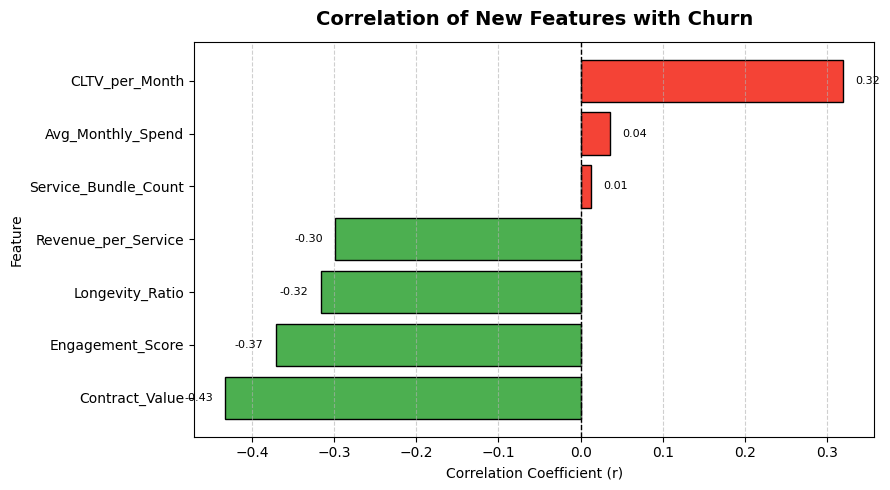

In [ ]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

corr_pd = corr_with_churn.to_pandas().sort_values("correlation", ascending=True)

colors = np.where(corr_pd["correlation"] < 0, "#4CAF50", "#F44336")

# --- Plot ---
plt.figure(figsize=(9, 5))
bars = plt.barh(corr_pd["feature"], corr_pd["correlation"], color=colors, edgecolor="black")

plt.title("Correlation of New Features with Churn", fontsize=14, weight="bold", pad=12)
plt.xlabel("Correlation Coefficient (r)", fontsize=10)
plt.ylabel("Feature", fontsize=10)
plt.axvline(0, color="black", linestyle="--", linewidth=1)

# Annotate bars with correlation values
for bar, value in zip(bars, corr_pd["correlation"]):
    plt.text(value + (0.015 if value >= 0 else -0.015),
             bar.get_y() + bar.get_height()/2,
             f"{value:.2f}",
             va="center",
             ha="left" if value >= 0 else "right",
             fontsize=8)

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


The correlation table gives a clear quantitative view of how each engineered feature relates to churn probability. Lets try to explain each one with a little more detail:  

**CLTV_per_Month (0.32):** Positive and moderate — customers generating higher lifetime value per month tend to churn slightly more. This may indicate that some high-value customers are price-sensitive or expect premium service quality; when disappointed, they leave.  

**Avg_Monthly_Spend (0.04):** Almost neutral — spending alone doesn’t explain churn. Customers paying more aren’t necessarily more or less likely to churn.

**Service_Bundle_Count (0.01):** Essentially no relationship — the number of subscribed services doesn’t predict churn, suggesting customers churn regardless of how many services they have.

**Revenue_per_Service (-0.30)**: Moderate negative — customers who derive more revenue per service are less likely to churn. This could reflect better perceived value or usage intensity.  

**Longevity_Ratio (-0.32):** Moderate negative — customers whose tenure relative to age is higher are more loyal. This makes sense: longer relationships imply higher retention.  

**Engagement_Score (-0.37)**: Moderately negative relationship — highly engaged customers, who stay longer and use more services, show a much lower churn tendency.

**Contract_Value (-0.43):** Strong negative — the longer the contract (one-year/two-year), the lower the churn. This is a key business insight: long-term contracts are an effective retention mechanism.  


# **Major Insights**

**1. Engagement_Score** and **Contract_Value** are the most powerful anti-churn indicators. They should feature prominently in any churn prediction model.  

**2. CLTV_per_Month** shows an interesting positive correlation: some high-value customers are at higher churn risk. These customers may be “attractive defectors” and they should be the target for proactive retention strategies.  

**3.** The weak correlations for **Avg_Monthly_Spend** and **Service_Bundle_Count** indicate that volume alone doesnt drive loyalty.

**4. Longevity_Ratio** and **Revenue_per_Service** add moderate explanatory power and complement the stronger features.

# **Costumer Strategy**

**Customer segmentation:** Target high CLTV, high spend, but low engagement customers with personalized retention actions.

**Contract strategy:** Encourage upgrades from monthly to annual contracts; it has measurable impact on churn.

**Predictive modeling:** Keep Engagement_Score and Contract_Value as key predictors; consider interaction terms with CLTV for richer insights.




# 4. PREDICTIVE MODELLING

As prediction models, and because our dataset is not very big (only 7.043 observations) we choose to start by use the following models:

*   Logistic Regression;
*   Random Forrest, and;
*   XGBoost

These three models represent a balanced and complementary set of algorithms that are widely established in churn prediction and customer analytics.

**Logistic Regression:** It will be used as baseline, offering clear coefficient-based insights and robust performance on linearly separable structures.  

**Random Forest:** Introduces non-linear modelling capacity and feature interaction, allowing the detection of complex behavioural patterns that linear models may miss.  

**XGBoost:** Extends this further with gradient boosting, which is recognised as one of the most effective techniques for tabular business data, providing superior accuracy, strong calibration, and compatibility with TreeSHAP for explainability.  

Together, these three models cover the main modelling paradigms used in industry for churn prediction—linear, bagging, and boosting—ensuring a rigorous comparison and a defensible model selection process.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, f1_score, precision_score, precision_recall_curve

print("\n4.1 - Preparing data for modeling...\n")

# Define categorical and numerical features
categorical_features = [
    "Gender", "Senior Citizen", "Married", "Dependents",
    "Contract", "Paperless Billing", "Payment Method",
    "Internet Type", "Phone Service", "Multiple Lines",
    "Online Security", "Online Backup", "Device Protection Plan",
    "Premium Tech Support", "Streaming TV", "Streaming Movies",
    "Streaming Music", "Unlimited Data"
]

numerical_features = [
    "Age", "Number of Dependents", "Tenure in Months",
    "Monthly Charge", "CLTV", "Number of Referrals", "Avg Monthly GB Download",
    "Population", "Longevity_Ratio", "Avg_Monthly_Spend",
    "Service_Bundle_Count", "Revenue_per_Service",
    "Engagement_Score", "Contract_Value", "Streaming_Count"
]

# Check for possible missing_cols in df_fe
missing_cols = [col for col in categorical_features + numerical_features if col not in df_fe.columns]
if missing_cols:
    print(f"Missing columns in dataset: {missing_cols}")
else:
    print("All modeling feature columns verified in DataFrame.")

# Create a clean dataset for modeling
df_model = df_fe.clone()

print("\nHandling missing values...\n")

# Fill numeric null values with column median
for col in numerical_features:
    median_val = df_model.select(pl.col(col).median()).item()
    df_model = df_model.with_columns(
        pl.col(col).fill_null(median_val)
    )

# Fill categorical columns with their mode (most frequent value)
for col in categorical_features:
    mode_val = (
        df_model.select(pl.col(col).mode().first())
        .to_series()[0]
        if df_model.select(pl.col(col).is_not_null().sum()).item() > 0
        else None
    )
    if mode_val is not None:
        df_model = df_model.with_columns(
            pl.col(col).fill_null(mode_val)
        )

print("Missing values handled (median for numeric, mode for categorical).\n")

print("Encoding categorical variables...\n")

for col in categorical_features:
    unique_vals = df_model.select(pl.col(col).unique()).to_series().to_list()
    mapping = {val: idx for idx, val in enumerate(sorted(unique_vals))}

    df_model = df_model.with_columns(
        pl.col(col).replace(mapping).cast(pl.Int32).alias(col + "_encoded")
    )

print("Categorical variables encoded as numeric codes.\n")



4.1 - Preparing data for modeling...

All modeling feature columns verified in DataFrame.

Handling missing values...

Missing values handled (median for numeric, mode for categorical).

Encoding categorical variables...

Categorical variables encoded as numeric codes.



In [ ]:
display(df_model)

Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,…,CLTV,Churn Category,Churn Reason,Population,Age_Group,Tenure_Group,Longevity_Ratio,Avg_Monthly_Spend,Service_Bundle_Count,Revenue_per_Service,Has_Dependents,Is_Heavy_User,CLTV_per_Month,Has_Premium_Services,Streaming_Count,Contract_Value,Engagement_Score,Population_Density,Churn_Binary,Gender_encoded,Senior Citizen_encoded,Married_encoded,Dependents_encoded,Contract_encoded,Paperless Billing_encoded,Payment Method_encoded,Internet Type_encoded,Phone Service_encoded,Multiple Lines_encoded,Online Security_encoded,Online Backup_encoded,Device Protection Plan_encoded,Premium Tech Support_encoded,Streaming TV_encoded,Streaming Movies_encoded,Streaming Music_encoded,Unlimited Data_encoded
str,i64,str,f64,str,str,str,str,f64,str,str,str,i64,str,f64,f64,str,str,f64,f64,str,str,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,…,f64,str,str,f64,str,str,f64,f64,f64,f64,i8,i8,f64,i8,f64,f64,f64,str,i8,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""8779-QRDMV""",1,"""Male""",78.0,"""No""","""Yes""","""No""","""No""",0.0,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,"""Q3""","""No""",0.0,1.0,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8.0,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""",…,5433.0,"""Competitor""","""Competitor offered more data""",68701.0,"""65+""","""0-12m""",0.012821,29.825,3.0,14.9125,0,0,2716.5,1,1.0,1.0,0.1025,"""High""",1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
"""7495-OOKFY""",1,"""Female""",74.0,"""No""","""Yes""","""Yes""","""Yes""",1.0,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,"""Q3""","""Yes""",1.0,8.0,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17.0,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""",…,5302.0,"""Competitor""","""Competitor made better offer""",55668.0,"""65+""","""0-12m""",0.108108,113.788889,4.0,204.82,1,0,589.111111,1,0.0,1.0,0.178333,"""High""",1,0,1,1,1,0,1,1,2,1,1,0,1,0,0,0,0,0,1
"""1658-BYGOY""",1,"""Male""",71.0,"""No""","""Yes""","""No""","""Yes""",3.0,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,"""Q3""","""No""",0.0,18.0,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52.0,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""",…,3179.0,"""Competitor""","""Competitor made better offer""",47534.0,"""65+""","""12-24m""",0.253521,100.572632,6.0,272.982857,1,1,167.315789,0,3.0,1.0,0.263333,"""Medium""",1,1,1,0,1,0,1,0,2,1,1,0,0,0,0,1,1,1,1
"""4598-XLKNJ""",1,"""Female""",78.0,"""No""","""Yes""","""Yes""","""Yes""",1.0,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,"""Q3""","""Yes""",1.0,25.0,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12.0,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""",…,5337.0,"""Dissatisfaction""","""Limited range of services""",27778.0,"""65+""","""24-48m""",0.320513,115.195,7.0,374.38375,1,0,205.269231,1,2.0,1.0,0.339167,"""Low""",1,0,1,1,1,0,1,0,2,1,0,0,1,1,0,1,1,0,1
"""4846-WHAFZ""",1,"""Female""",80.0,"""No""","""Yes""","""Yes""","""Yes""",1.0,"""United States""","""California""","""Whittier"

In [ ]:
print("\n4.2 - Preparing feature matrix and target...\n")

encoded_categorical = [col + "_encoded" for col in categorical_features]

X = df_model.select(numerical_features + encoded_categorical)
y = df_model.select("Churn_Binary")

print(f"  - Feature matrix shape: {X.shape}")

# Convert to pandas for sklearn and compute distribution
X_pd = X.to_pandas()
y_pd = y.to_pandas().squeeze()   # single-column DF -> Series
print(f"  - Target distribution: {y_pd.value_counts().to_dict()}")

print("\nSplitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_pd, y_pd, test_size=0.2, random_state=42, stratify=y_pd
)
print(f"  - Training set: {X_train.shape}")
print(f"  - Test set: {X_test.shape}")

print("\nScaling numerical features...")
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nNumerical features scaled and data ready for modeling.\n")



4.2 - Preparing feature matrix and target...

  - Feature matrix shape: (7043, 33)
  - Target distribution: {0: 5174, 1: 1869}

Splitting data into train and test sets...
  - Training set: (5634, 33)
  - Test set: (1409, 33)

Scaling numerical features...

Numerical features scaled and data ready for modeling.



In [ ]:
print("\n4.3. Training predictive models...")

models = {}
predictions = {}
probabilities = {}

print("\n  Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model
predictions['Logistic Regression'] = lr_model.predict(X_test_scaled)
probabilities['Logistic Regression'] = lr_model.predict_proba(X_test_scaled)[:, 1]
print("\n  Logistic Regression trained")



4.3. Training predictive models...

  Training Logistic Regression...

  Logistic Regression trained


In [ ]:
print("\n  Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_model.predict(X_test)
probabilities['Random Forest'] = rf_model.predict_proba(X_test)[:, 1]
print("\n  Random Forest trained")


  Training Random Forest...

  Random Forest trained


In [ ]:
print("\n  Training XGBoost...")
# Calculate scale_pos_weight for imbalanced data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_model = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight,
                         learning_rate=0.1, max_depth=5, n_jobs=-1)
xgb_model.fit(X_train, y_train)
models['XGBoost'] = xgb_model
predictions['XGBoost'] = xgb_model.predict(X_test)
probabilities['XGBoost'] = xgb_model.predict_proba(X_test)[:, 1]
print("\n  XGBoost trained")


  Training XGBoost...

  XGBoost trained


#5. MODEL's EVALUATION

For the churn project, the recall level is extremely important. Recall measures how many true churners our models can detect. The higher, the better.

False negatives (missed churners) are usually expensive because we lose customers who can be maintained with low-cost targeted actions. False positives (flagging non-churners) are less damaging, but still costly because we target and spend resources on customers who don't intend to leave us.  

Based on that we explicitly had a **target Recall >= 0.80** as the core metric to evaluate our three models.


In [ ]:
print("\n5.1. Model Performance Comparison...")

results = []
for model_name in models.keys():
    y_pred = predictions[model_name]
    y_prob = probabilities[model_name]

    # Calculate metrics
    accuracy = (y_pred == y_test).mean()
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"\n{model_name}:")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall: {recall:.4f} {'MEETS TARGET (>0.80)' if recall > 0.80 else 'Below target'}")
    print(f"  - F1-Score: {f1:.4f}")
    print(f"  - ROC-AUC: {roc_auc:.4f}")

# Create results DataFrame (Polars)
results_df = pl.DataFrame(results)

# Save to CSV
results_df.write_csv(output_path + "model_comparison.csv")
print(f"\nModel comparison saved: {output_path}model_comparison.csv")



5.1. Model Performance Comparison...

Logistic Regression:
  - Accuracy: 0.7970
  - Precision: 0.5789
  - Recall: 0.8636 MEETS TARGET (>0.80)
  - F1-Score: 0.6931
  - ROC-AUC: 0.9046

Random Forest:
  - Accuracy: 0.8432
  - Precision: 0.7629
  - Recall: 0.5936 Below target
  - F1-Score: 0.6677
  - ROC-AUC: 0.9025

XGBoost:
  - Accuracy: 0.8176
  - Precision: 0.6177
  - Recall: 0.8209 MEETS TARGET (>0.80)
  - F1-Score: 0.7049
  - ROC-AUC: 0.9106

Model comparison saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/model_comparison.csv


**Model Performance Analisys**

Looking at the numbers above we can constact the Random Forest is below target Recal constraint. Logistic Regression has the best recall, but the recall of XGBoost is still above threshold and comes with better balancing of all the other metrics.

Looking at the numbers above, we can conclude that the Random Forest is below our imposed **Target Recall constraint**. Logistic Regression has the best recall, but XGBoost's recall is still above the threshold and this model provides better balance across all the other metrics. In fact, although Logistic Regression delivered the highest Recall, it did so with noticeably lower Precision, resulting in a weaker F1-Score and an increased risk of false positives. In contrast, XGBoost achieved the best overall balance between Precision and Recall (F1-Score = 0.7049) and delivered the strongest ranking performance (ROC-AUC = 0.9106), indicating superior discrimination between churners and non-churners.

This indicates that **XGBoost it is more capable of separating churners from non-churners across thresholds**.

On top of that XGBoost usually is the best choice for churn because:

*   Handles non-linearities and interactions exceptionally well
*   Handles imbalanced datasets better with scale_pos_weight
*   Is less sensitive to outliers than logistic regression
*   Due to regularization is less prone to overfitting than Random Forest


**Thresholds Optimization**

To refine model selection beyond default classifier behavior, all three models were evaluated under optimal threshold tuning conditions. Two criteria were applied:


*   The threshold that maximizes the F1-score, and;
*   The optimal threshold that preserves the business requirement of achieving Recall ≥ 0.80.

Logistic Regression reached the recall target but required an aggressive reduction in the decision threshold, which significantly lowered precision and resulted in a weaker balance between false positives and false negatives. Random Forest could not achieve the required recall level without collapsing overall performance, confirming its unsuitability for our use case.


In [ ]:
print("\n5.2. Optimal Thresholds per Model (with Recall>=0.80 constraint)...")

threshold_results = []

TARGET_RECALL = 0.80

for model_name in models.keys():
    y_prob = probabilities[model_name]

    # PR curve
    prec, rec, thr = precision_recall_curve(y_test, y_prob)
    # Align with thresholds array length (n_thresholds = n_points - 1)
    prec_t = prec[:-1]
    rec_t  = rec[:-1]
    thr_t  = thr

    f1_t = 2 * (prec_t * rec_t) / (prec_t + rec_t + 1e-12)

    # --- Best F1 overall (may hurt recall) ---
    best_f1_idx = f1_t.argmax()
    best_f1_thr = thr_t[best_f1_idx]

    y_pred_f1 = (y_prob >= best_f1_thr).astype(int)
    acc_f1 = (y_pred_f1 == y_test).mean()
    prec_f1 = precision_score(y_test, y_pred_f1)
    rec_f1  = recall_score(y_test, y_pred_f1)
    f1_best = f1_score(y_test, y_pred_f1)
    roc_auc = roc_auc_score(y_test, y_prob)

    # --- Best threshold with Recall >= TARGET_RECALL (maximize F1 under constraint) ---
    mask = rec_t >= TARGET_RECALL
    if mask.any():
        idx_c = np.argmax(f1_t[mask])
        best_c_thr = thr_t[mask][idx_c]
        y_pred_c = (y_prob >= best_c_thr).astype(int)
        acc_c = (y_pred_c == y_test).mean()
        prec_c = precision_score(y_test, y_pred_c)
        rec_c  = recall_score(y_test, y_pred_c)
        f1_c   = f1_score(y_test, y_pred_c)
    else:
        # If model cannot reach the recall target at any threshold, fall back to max recall
        max_rec_idx = rec_t.argmax()
        best_c_thr = thr_t[max_rec_idx]
        y_pred_c = (y_prob >= best_c_thr).astype(int)
        acc_c = (y_pred_c == y_test).mean()
        prec_c = precision_score(y_test, y_pred_c)
        rec_c  = recall_score(y_test, y_pred_c)
        f1_c   = f1_score(y_test, y_pred_c)

    print(f"\n{model_name}:")
    print(f"  - Best-F1 threshold: {best_f1_thr:.3f} | Acc {acc_f1:.4f} | Prec {prec_f1:.4f} | Recall {rec_f1:.4f} | F1 {f1_best:.4f} | ROC-AUC {roc_auc:.4f}")
    print(f"  - Best threshold with Recall≥{TARGET_RECALL:.2f}: {best_c_thr:.3f} | Acc {acc_c:.4f} | Prec {prec_c:.4f} | Recall {rec_c:.4f} | F1 {f1_c:.4f}")

    threshold_results.append({
        "Model": model_name,
        "ROC-AUC": roc_auc,
        "Best-F1 Threshold": best_f1_thr,
        "Best-F1 Accuracy": acc_f1,
        "Best-F1 Precision": prec_f1,
        "Best-F1 Recall": rec_f1,
        "Best-F1 F1": f1_best,
        f"Best Threshold (Recall>={TARGET_RECALL:.2f})": best_c_thr,
        f"Acc @Recall>={TARGET_RECALL:.2f}": acc_c,
        f"Prec @Recall>={TARGET_RECALL:.2f}": prec_c,
        f"Recall @Recall>={TARGET_RECALL:.2f}": rec_c,
        f"F1 @Recall>={TARGET_RECALL:.2f}": f1_c,
    })

# To Polars
thresholds_df = pl.DataFrame(threshold_results)
thresholds_df.write_csv(output_path + "model_thresholds_metrics.csv")
print(f"\nThreshold tuning results saved: {output_path}model_thresholds_metrics.csv")



5.2. Optimal Thresholds per Model (with Recall>=0.80 constraint)...

Logistic Regression:
  - Best-F1 threshold: 0.609 | Acc 0.8261 | Prec 0.6387 | Recall 0.7941 | F1 0.7080 | ROC-AUC 0.9046
  - Best threshold with Recall≥0.80: 0.585 | Acc 0.8190 | Prec 0.6227 | Recall 0.8075 | F1 0.7031

Random Forest:
  - Best-F1 threshold: 0.350 | Acc 0.8318 | Prec 0.6568 | Recall 0.7674 | F1 0.7078 | ROC-AUC 0.9025
  - Best threshold with Recall≥0.80: 0.300 | Acc 0.8162 | Prec 0.6186 | Recall 0.8021 | F1 0.6985

XGBoost:
  - Best-F1 threshold: 0.627 | Acc 0.8517 | Prec 0.7089 | Recall 0.7487 | F1 0.7282 | ROC-AUC 0.9106
  - Best threshold with Recall≥0.80: 0.521 | Acc 0.8282 | Prec 0.6392 | Recall 0.8102 | F1 0.7146

Threshold tuning results saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/model_thresholds_metrics.csv


In [ ]:
print("\n5.3. Thresholds Optimized for Recall ≥ 0.80 with Highest F1...\n")

target_recall = 0.80
recall_optimized_results = []

for model_name in models.keys():
    y_prob = probabilities[model_name]

    # Precision, recall, thresholds
    prec, rec, thr = precision_recall_curve(y_test, y_prob)
    prec_t, rec_t, thr_t = prec[:-1], rec[:-1], thr  # align lengths
    f1_t = 2 * (prec_t * rec_t) / (prec_t + rec_t + 1e-12)

    # Filter thresholds that achieve recall >= 0.8
    valid_idx = np.where(rec_t >= target_recall)[0]
    if len(valid_idx) == 0:
        print(f"\n{model_name}: No threshold reaches recall ≥ {target_recall:.2f}")
        continue

    # Choose threshold among those that maximizes F1
    best_idx = valid_idx[np.argmax(f1_t[valid_idx])]
    best_thresh = thr_t[best_idx]

    # Predictions at best threshold
    y_pred_opt = (y_prob >= best_thresh).astype(int)

    accuracy = (y_pred_opt == y_test).mean()
    precision = precision_score(y_test, y_pred_opt)
    recall = recall_score(y_test, y_pred_opt)
    f1 = f1_score(y_test, y_pred_opt)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n{model_name}:")
    print(f"  - Optimal Threshold (Recall≥0.80, Max F1): {best_thresh:.3f}")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall: {recall:.4f}")
    print(f"  - F1-Score: {f1:.4f}")
    print(f"  - ROC-AUC: {roc_auc:.4f}")

    recall_optimized_results.append({
        "Model": model_name,
        "Optimal Threshold": best_thresh,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

# Convert to Polars DataFrame
recall_opt_df = pl.DataFrame(recall_optimized_results)
recall_opt_df.write_csv(output_path + "model_recall_optimized.csv")

print(f"\nRecall-optimized model results saved: {output_path}model_recall_optimized.csv")


5.3. Thresholds Optimized for Recall ≥ 0.80 with Highest F1...


Logistic Regression:
  - Optimal Threshold (Recall≥0.80, Max F1): 0.585
  - Accuracy: 0.8190
  - Precision: 0.6227
  - Recall: 0.8075
  - F1-Score: 0.7031
  - ROC-AUC: 0.9046

Random Forest:
  - Optimal Threshold (Recall≥0.80, Max F1): 0.300
  - Accuracy: 0.8162
  - Precision: 0.6186
  - Recall: 0.8021
  - F1-Score: 0.6985
  - ROC-AUC: 0.9025

XGBoost:
  - Optimal Threshold (Recall≥0.80, Max F1): 0.521
  - Accuracy: 0.8282
  - Precision: 0.6392
  - Recall: 0.8102
  - F1-Score: 0.7146
  - ROC-AUC: 0.9106

Recall-optimized model results saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/model_recall_optimized.csv


**Confusion Matrices**

Examining the confusion matrices for the three models (Logistic Regression, Random Forest, and XGBoost) provides a clearer understanding of the business impact of using each model.

Each matrix has four quadrants.

  *   **True Negatives (Top-left):** Customers correctly predicted as non-churners.No retention action needs to be taken, and this is the appropriate decision.  

  *   **False Positives (Top-right):** Customers predicted as churners but who would actually stay. The company will unnecessarily contact or offer an incentive to these customers, generating extra retention cost but not revenue loss.  

  *   **False Negatives (Bottom-left):** Customers who actually churn but were predicted as non-churners.These are the most critical errors: the company does not intervene and loses the customer's future revenue.  

  *   **True Positives (Bottom-right):** Customers correctly identified as churners. These are the customers who can be targeted with retention actions, where the intervention has the potential to generate positive ROI.

From a business perspective, the model should **minimise False Negatives**  (missed churners) while **keeping False Positives** (unnecessary actions) at an acceptable level, given the cost of campaigns.

*XGBoost's confusion matrix demonstrates strong coverage of true churners (high TP) with moderate and manageable FP, it offers the best compromise between revenue protection and retention cost. This makes XGBoost the most attractive option from a business standpoint, not only statistically but also in terms of how retention actions will be deployed in practice.*


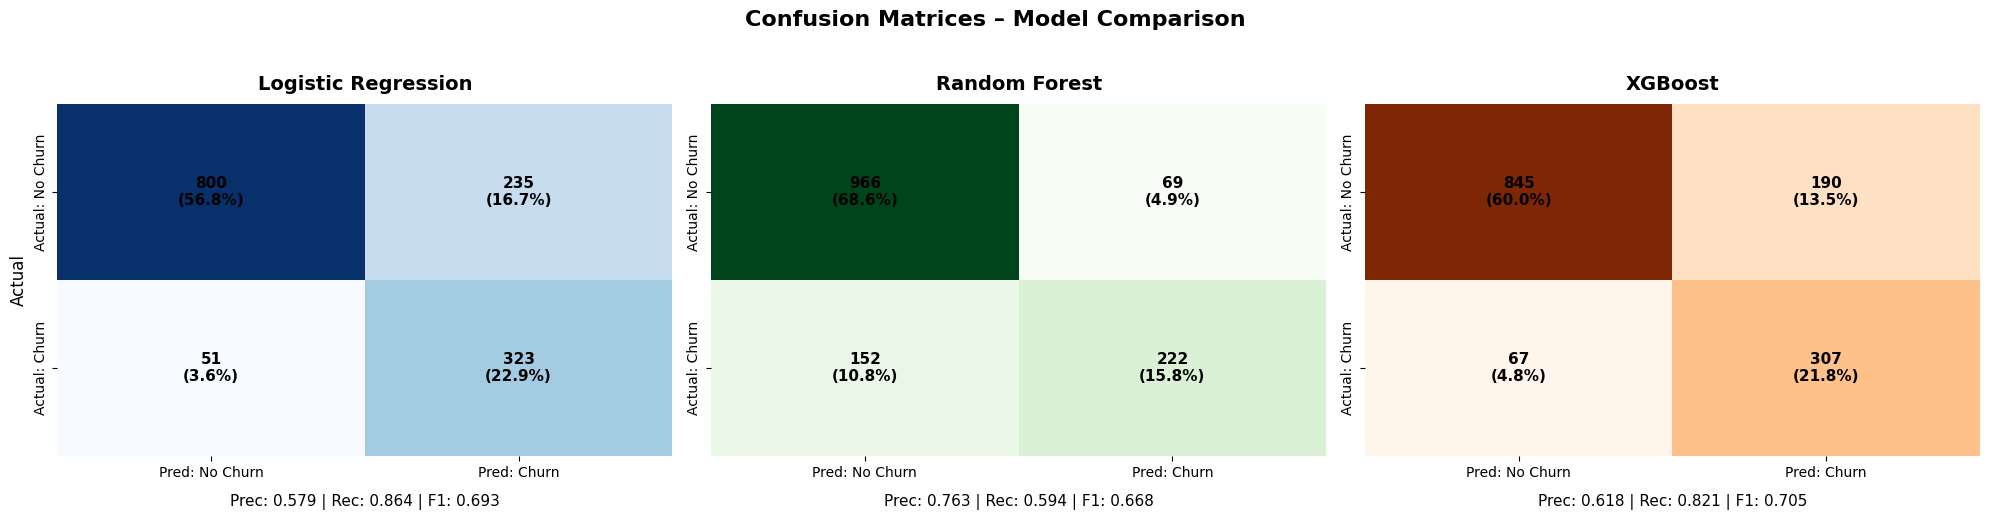


Side-by-side confusion matrix panel saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/confusion_matrices_panel.png



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Fixed order so the plots are always in the same sequence
model_order = ["Logistic Regression", "Random Forest", "XGBoost"]

# Optional colour map per model
model_cmaps = {
    "Logistic Regression": "Blues",
    "Random Forest": "Greens",
    "XGBoost": "Oranges"
}

y_test_np = y_test.to_numpy() if isinstance(y_test, pl.Series) else y_test

# Create 1x3 panel
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for idx, model_name in enumerate(model_order):
    ax = axes[idx]
    preds = predictions[model_name]
    y_pred_np = preds.to_numpy() if isinstance(preds, pl.Series) else preds

    # Confusion matrix + percentages
    cm = confusion_matrix(y_test_np, y_pred_np)
    cm_percent = cm / cm.sum() * 100

    # Metrics
    prec = precision_score(y_test_np, y_pred_np)
    rec = recall_score(y_test_np, y_pred_np)
    f1 = f1_score(y_test_np, y_pred_np)

    # Heatmap
    cmap = model_cmaps.get(model_name, "Blues")
    sns.heatmap(
        cm,
        annot=False,
        fmt="d",
        cmap=cmap,
        cbar=False,
        xticklabels=["Pred: No Churn", "Pred: Churn"],
        yticklabels=["Actual: No Churn", "Actual: Churn"],
        ax=ax
    )

    # Annotate with counts + percentages
    for i in range(2):
        for j in range(2):
            count = cm[i, j]
            pct = cm_percent[i, j]
            ax.text(
                j + 0.5,
                i + 0.5,
                f"{count}\n({pct:.1f}%)",
                ha="center",
                va="center",
                fontsize=11,
                fontweight="bold",
                color="black"
            )

    # Title and metrics line
    ax.set_title(model_name, fontsize=14, fontweight="bold", pad=10)
    ax.set_xlabel(
        f"Prec: {prec:.3f} | Rec: {rec:.3f} | F1: {f1:.3f}",
        fontsize=11,
        labelpad=10
    )
    ax.set_ylabel("")

# Common y-label on the left side
axes[0].set_ylabel("Actual", fontsize=12)

plt.suptitle("Confusion Matrices – Model Comparison", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()

# Show inline
plt.show()

# Save panel
panel_path = output_path + "confusion_matrices_panel.png"
fig.savefig(panel_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print(f"\nSide-by-side confusion matrix panel saved to: {panel_path}\n")



5.5. Generating ROC curves...


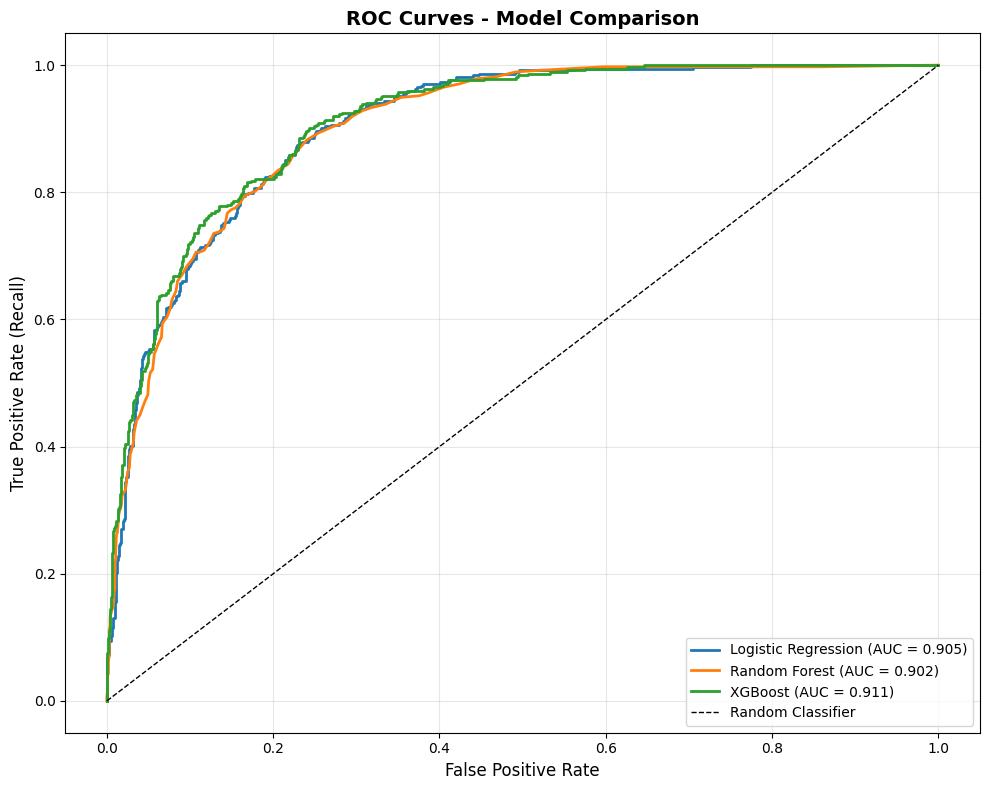

  ✓ ROC curves saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/roc_curves_comparison.png


In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve, roc_auc_score
#import polars as pl

# 5.3. ROC Curves
print("\n5.5. Generating ROC curves...")

plt.figure(figsize=(10, 8))

# Convert y_test to numpy if stored as Polars
y_test_np = y_test.to_numpy() if isinstance(y_test, pl.Series) else y_test

for model_name, probs in probabilities.items():
    # Convert probabilities to numpy if Polars
    y_prob_np = probs.to_numpy() if isinstance(probs, pl.Series) else probs

    # Compute ROC components
    fpr, tpr, _ = roc_curve(y_test_np, y_prob_np)
    auc = roc_auc_score(y_test_np, y_prob_np)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})", linewidth=2)

# Baseline diagonal
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier", linewidth=1)

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.title("ROC Curves - Model Comparison", fontsize=14, fontweight="bold")
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig(output_path + "roc_curves_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"  ✓ ROC curves saved: {output_path}roc_curves_comparison.png")



5.6. Feature Importance Analysis...
Random Forest feature importance saved
XGBoost feature importance saved


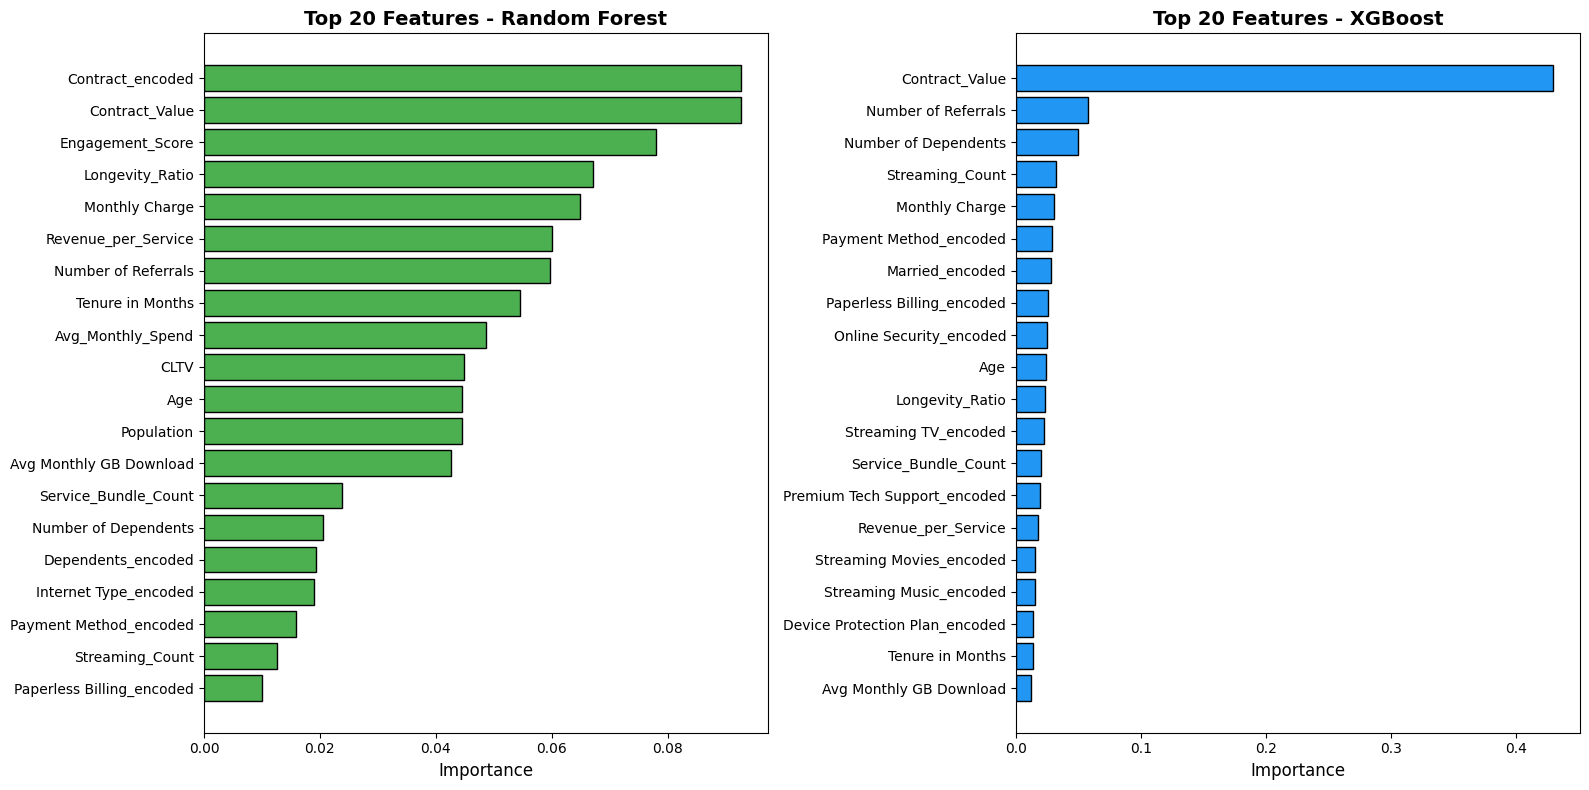

Feature importance visualization saved


In [ ]:
print("\n5.6. Feature Importance Analysis...")

# --- Random Forest feature importance
rf_importance = pl.DataFrame({
    "Feature": X.columns,
    "Importance": models["Random Forest"].feature_importances_.tolist()
}).sort("Importance", descending=True)

rf_importance.write_csv(output_path + "feature_importance_rf.csv")
print("Random Forest feature importance saved")

# --- XGBoost feature importance
xgb_importance = pl.DataFrame({
    "Feature": X.columns,
    "Importance": models["XGBoost"].feature_importances_.tolist()
}).sort("Importance", descending=True)

xgb_importance.write_csv(output_path + "feature_importance_xgb.csv")
print("XGBoost feature importance saved")

# --- Visualization of Top 20 Features
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Convert to pandas for Matplotlib plotting convenience
rf_pd = rf_importance.head(20).to_pandas()
xgb_pd = xgb_importance.head(20).to_pandas()

# Random Forest
axes[0].barh(rf_pd["Feature"], rf_pd["Importance"], color="#4CAF50", edgecolor="black")
axes[0].set_xlabel("Importance", fontsize=12)
axes[0].set_title("Top 20 Features - Random Forest", fontsize=14, fontweight="bold")
axes[0].invert_yaxis()

# XGBoost
axes[1].barh(xgb_pd["Feature"], xgb_pd["Importance"], color="#2196F3", edgecolor="black")
axes[1].set_xlabel("Importance", fontsize=12)
axes[1].set_title("Top 20 Features - XGBoost", fontsize=14, fontweight="bold")
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig(output_path + "feature_importance_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print("Feature importance visualization saved")


In [ ]:
# --- Paths ---
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/01_Data"
INPUT_FILE = os.path.join(DATA_DIR, "Telco_customer_churn_status.xlsx")
OUTPUT_HTML = os.path.join(output_path, "cumulative_monthly_loss_churners_polars.html")
OUTPUT_CSV = os.path.join(output_path, "churners_monthly_loss_polars.csv")

# --- Load dataset ---
status_df = pl.read_excel(INPUT_FILE)

# --- Filter churned customers ---
churned = status_df.filter(
    pl.col("Churn Label").str.strip_chars().str.to_lowercase() == "yes"
)

# --- Compute CLTV monthly proxy ---
churned = churned.with_columns(
    (pl.col("CLTV") / 12).alias("CLTV_Monthly_Proxy")
)

# --- Sort by CLTV monthly ---
churned = churned.sort("CLTV_Monthly_Proxy", descending=True)

# --- Add rank and cumulative loss ---
churned = churned.with_columns([
    pl.arange(1, churned.height + 1).alias("Churner Rank"),
    pl.col("CLTV_Monthly_Proxy").cum_sum().alias("Cumulative_Monthly_Loss")
])

# --- Convert to pandas for Plotly visualization ---
churned_pd = churned.to_pandas()

# --- Interactive Plotly line chart ---
fig = px.line(
    churned_pd,
    x="Churner Rank",
    y="Cumulative_Monthly_Loss",
    hover_data={
        "Customer ID": True,
        "CLTV_Monthly_Proxy": ":.2f",
        "Cumulative_Monthly_Loss": ":.2f",
        "Quarter": True,
        "Churn Category": True,
        "Churn Reason": True
    },
    title="Cumulative Monthly Loss from Churners (CLTV monthly proxy)"
)
fig.update_traces(mode="lines+markers")

# --- Save outputs ---
fig.write_html(OUTPUT_HTML, include_plotlyjs="cdn")
churned.select([
    "Churner Rank", "Customer ID", "CLTV_Monthly_Proxy",
    "Cumulative_Monthly_Loss", "Quarter", "Churn Category", "Churn Reason"
]).write_csv(OUTPUT_CSV)

print(f"\n✅ Chart saved to: {OUTPUT_HTML}")
print(f"✅ Data saved to: {OUTPUT_CSV}")

fig.show()



✅ Chart saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/01_Data/cumulative_monthly_loss_churners_polars.html
✅ Data saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/01_Data/churners_monthly_loss_polars.csv


#6.EXPLAINABILITY AND VISUALISATION

This section focuses on understanding **why** the model makes certain predictions and creating interactive visualizations to communicate insights effectively.

**Key Components:**
- **SHAP Analysis:** Global and local feature importance
- **Interactive Dashboards:** Plotly visualizations
- **Geographic Maps:** Spatial churn patterns


In [ ]:
print("Installing Required Libraries .... \n")

# Install SHAP
#!pip install shap lime -q
#print("\nSHAP and LIME installed successfully\n")
!pip install shap -q
print("\nSHAP installed successfully\n")


Installing Required Libraries .... 


SHAP installed successfully



In [ ]:
print("\nImporting libraries .... \n")
import shap
#import lime
#from lime.lime_tabular import LimeTabularExplainer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl

print("\nLibraries imported successfully")


Importing libraries .... 


Libraries imported successfully


In [ ]:
print("\nSHAP Analysis for Model Interpretability...")

# Select the best model
best_model_name = 'XGBoost'
best_model = models[best_model_name]

# Convert test data to numpy for SHAP
X_test_np = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test

# Create SHAP explainer
print(f"\nCreating SHAP explainer for {best_model_name}...")
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_np)

print(f"SHAP values calculated for {X_test_np.shape[0]} test samples")


SHAP Analysis for Model Interpretability...

Creating SHAP explainer for XGBoost...
SHAP values calculated for 1409 test samples



SHAP Feature Importance (Global)...


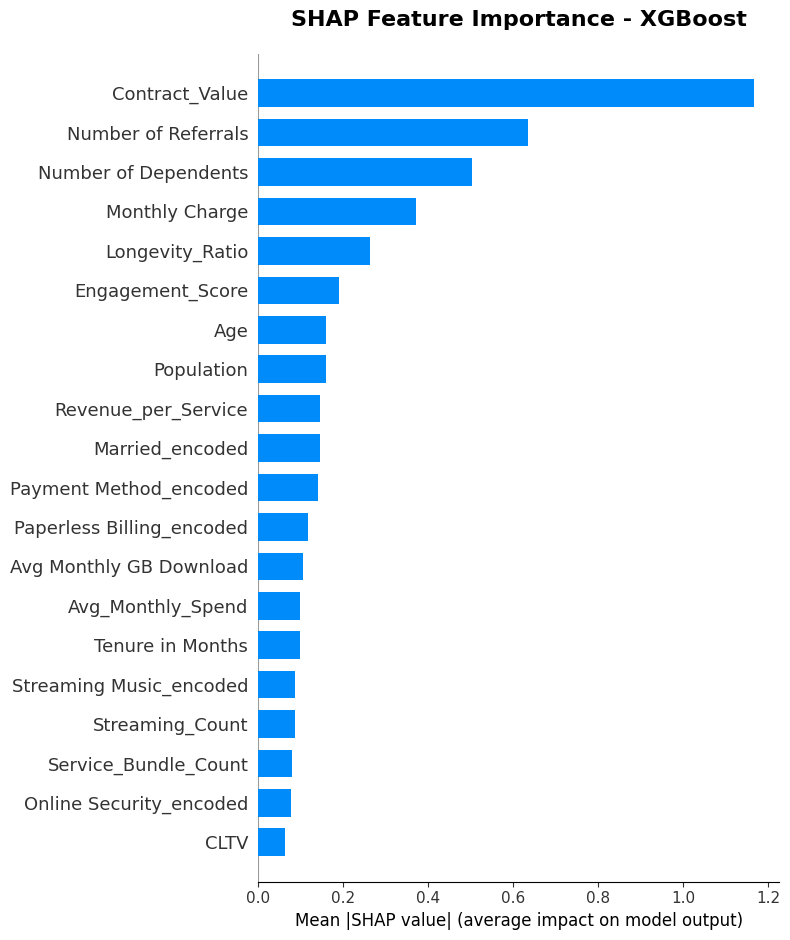

Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//shap_feature_importance.png


In [ ]:
print("\nSHAP Feature Importance (Global)...")

# Create summary plot (bar chart showing average impact)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_np,
                  feature_names=X.columns.to_list() if hasattr(X.columns, 'to_list') else list(X.columns),
                  plot_type="bar",
                  show=False,
                  max_display=20)
plt.title(f'SHAP Feature Importance - {best_model_name}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mean |SHAP value| (average impact on model output)', fontsize=12)
plt.tight_layout()
plt.savefig(f'{output_path}/shap_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved: {output_path}/shap_feature_importance.png")



SHAP Feature Impact Distribution...


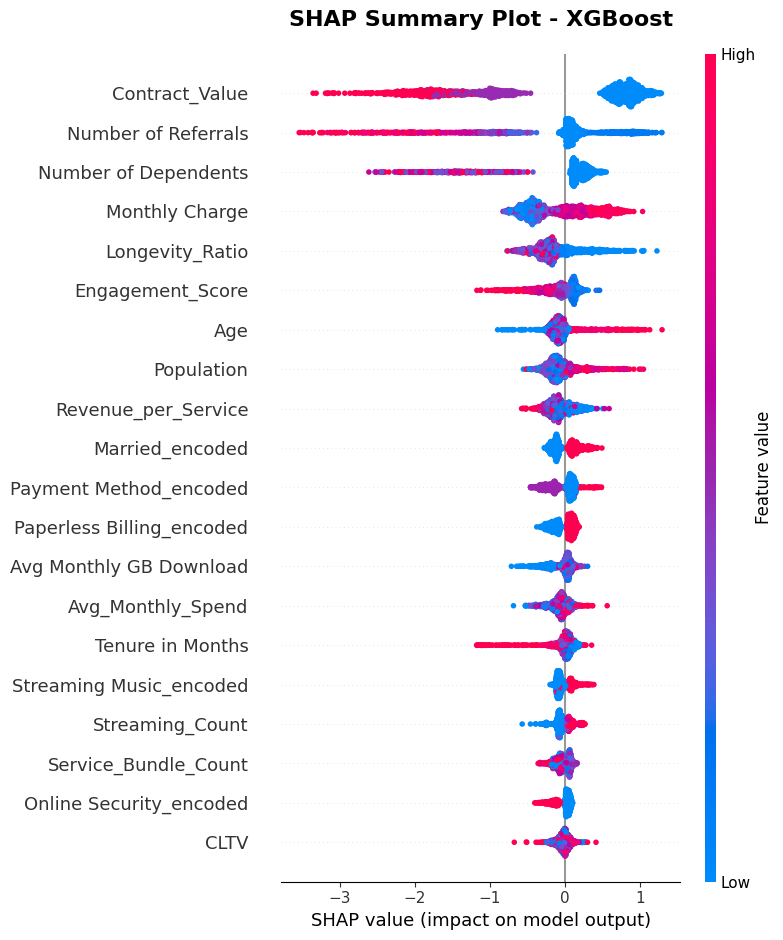

✓ Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//shap_summary_detailed.png

Interpretation:
  - Each dot represents a customer
  - Red = High feature value, Blue = Low feature value
  - Position on x-axis shows impact on churn prediction


In [ ]:
print("\nSHAP Feature Impact Distribution...")

# Create detailed summary plot (beeswarm)
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test_np,
                  feature_names=X.columns.to_list() if hasattr(X.columns, 'to_list') else list(X.columns),
                  show=False,
                  max_display=20)
plt.title(f'SHAP Summary Plot - {best_model_name}', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(f'{output_path}/shap_summary_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: {output_path}/shap_summary_detailed.png")
print("\nInterpretation:")
print("  - Each dot represents a customer")
print("  - Red = High feature value, Blue = Low feature value")
print("  - Position on x-axis shows impact on churn prediction")



SHAP Dependence Plots for Top Features...


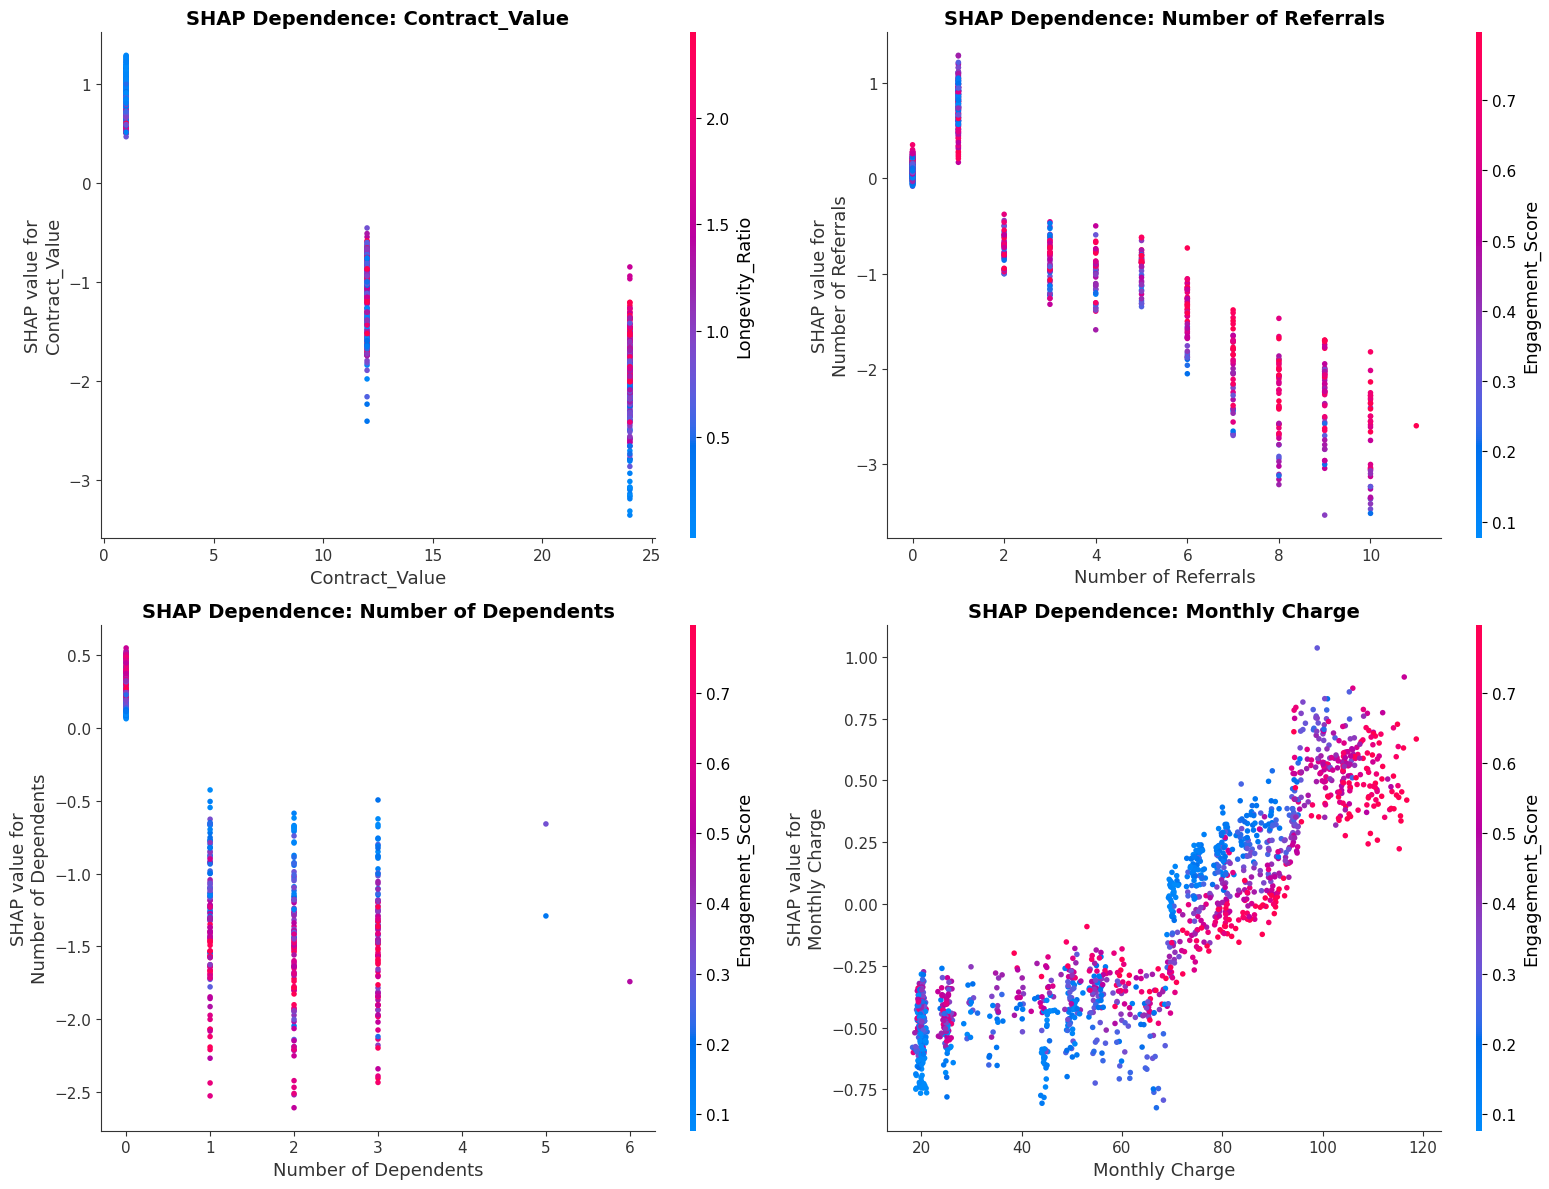

✓ Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//shap_dependence_plots.png

Top 4 most important features: ['Contract_Value', 'Number of Referrals', 'Number of Dependents', 'Monthly Charge']


In [ ]:
print("\nSHAP Dependence Plots for Top Features...")

# Get top 4 most important features
feature_importance = np.abs(shap_values).mean(axis=0)
top_features_idx = np.argsort(feature_importance)[-4:][::-1]
feature_names = X.columns.to_list() if hasattr(X.columns, 'to_list') else list(X.columns)
top_features = [feature_names[i] for i in top_features_idx]

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature_idx in enumerate(top_features_idx):
    shap.dependence_plot(feature_idx, shap_values, X_test_np,
                        feature_names=feature_names,
                        ax=axes[idx],
                        show=False)
    axes[idx].set_title(f'SHAP Dependence: {feature_names[feature_idx]}',
                       fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{output_path}/shap_dependence_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Saved: {output_path}/shap_dependence_plots.png")
print(f"\nTop 4 most important features: {top_features}")


In [ ]:
print("\nSHAP Force Plots for Individual Predictions...")

# Select a few interesting cases
churned_idx = np.where(y_test.to_numpy() == 1)[0][0] if hasattr(y_test, 'to_numpy') else np.where(y_test == 1)[0][0]
not_churned_idx = np.where(y_test.to_numpy() == 0)[0][0] if hasattr(y_test, 'to_numpy') else np.where(y_test == 0)[0][0]

print(f"\nExample 1: Customer who CHURNED (index {churned_idx})")
shap.initjs()
force_plot_churned = shap.force_plot(explainer.expected_value,
                                     shap_values[churned_idx,:],
                                     X_test_np[churned_idx,:],
                                     feature_names=feature_names)

print(f"\nExample 2: Customer who STAYED (index {not_churned_idx})")
force_plot_stayed = shap.force_plot(explainer.expected_value,
                                   shap_values[not_churned_idx,:],
                                   X_test_np[not_churned_idx,:],
                                   feature_names=feature_names)

# Save as HTML
shap.save_html(f'{output_path}/shap_force_plot_churned.html', force_plot_churned)
shap.save_html(f'{output_path}/shap_force_plot_stayed.html', force_plot_stayed)

print(f"✓ Saved: {output_path}/shap_force_plot_churned.html")
print(f"✓ Saved: {output_path}/shap_force_plot_stayed.html")


SHAP Force Plots for Individual Predictions...

Example 1: Customer who CHURNED (index 9)



Example 2: Customer who STAYED (index 0)
✓ Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//shap_force_plot_churned.html
✓ Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//shap_force_plot_stayed.html


**LIME Analysis **

In [ ]:
#Interactive Dashboard - Churn by Contract Type
print("\nInteractive Plotly Visualizations...")

# Convert to pandas for easier plotting with Plotly
df_plot = df_fe.to_pandas() if hasattr(df_fe, 'to_pandas') else df_fe

# Churn by Contract Type
contract_churn_data = df_plot.groupby(['Contract', 'Churn Label']).size().reset_index(name='Count')

fig = px.bar(contract_churn_data,
             x='Contract',
             y='Count',
             color='Churn Label',
             barmode='group',
             title='Customer Churn Distribution by Contract Type',
             labels={'Count': 'Number of Customers', 'Contract': 'Contract Type'},
             color_discrete_map={'No': '#2ecc71', 'Yes': '#e74c3c'},
             text='Count')

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    font=dict(size=12),
    title_font=dict(size=18, family='Arial Black'),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    legend_title_text='Churn Status',
    height=500
)

fig.write_html(f'{output_path}/interactive_churn_by_contract.html')
fig.show()

print(f"Saved: {output_path}/interactive_churn_by_contract.html")


Interactive Plotly Visualizations...


Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//interactive_churn_by_contract.html


In [ ]:
print("\nChurn Distribution by Tenure Group...")

# Ensure Tenure_Group exists
if 'Tenure_Group' not in df_plot.columns:
    df_plot['Tenure_Group'] = pd.cut(df_plot['Tenure in Months'],
                                     bins=[0, 12, 24, 48, 100],
                                     labels=['0-12m', '12-24m', '24-48m', '48m+'])

tenure_churn_data = df_plot.groupby(['Tenure_Group', 'Churn Label']).size().reset_index(name='Count')

fig = px.bar(tenure_churn_data,
             x='Tenure_Group',
             y='Count',
             color='Churn Label',
             barmode='group',
             title='Customer Churn Distribution by Tenure Group',
             labels={'Count': 'Number of Customers', 'Tenure_Group': 'Tenure Group'},
             color_discrete_map={'No': '#2ecc71', 'Yes': '#e74c3c'},
             text='Count')

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    font=dict(size=12),
    title_font=dict(size=18, family='Arial Black'),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    legend_title_text='Churn Status',
    height=500
)

fig.write_html(f'{output_path}/interactive_churn_by_tenure.html')
fig.show()

print(f"✓ Saved: {output_path}/interactive_churn_by_tenure.html")


Churn Distribution by Tenure Group...


✓ Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//interactive_churn_by_tenure.html


In [ ]:
print("\nFinancial Metrics Comparison by Churn Status...")

financial_metrics = ['Monthly Charge', 'Total Revenue', 'CLTV']
churn_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=financial_metrics,
                    specs=[[{"type": "box"}, {"type": "box"}, {"type": "box"}]])

for idx, metric in enumerate(financial_metrics, 1):
    for churn_label in churn_labels:
        data = df_plot[df_plot['Churn Label'] == churn_label][metric]
        fig.add_trace(
            go.Box(y=data, name=f'Churn: {churn_label}',
                   marker_color='#e74c3c' if churn_label == 'Yes' else '#2ecc71',
                   showlegend=(idx == 1)),
            row=1, col=idx
        )

fig.update_layout(
    title_text='Financial Metrics Distribution by Churn Status',
    title_font=dict(size=18, family='Arial Black'),
    height=500,
    showlegend=True
)

fig.write_html(f'{output_path}/interactive_financial_metrics.html')
fig.show()

print(f"Saved: {output_path}/interactive_financial_metrics.html")


Financial Metrics Comparison by Churn Status...


Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//interactive_financial_metrics.html


In [ ]:
#Geographic Churn Map
print("\nGeographic Churn Map...")

# Prepare geographic data
geo_data = df_plot.groupby(['City', 'Latitude', 'Longitude']).agg({
    'Customer ID': 'count',
    'Churn_Binary': 'sum'
}).reset_index()

geo_data.columns = ['City', 'Latitude', 'Longitude', 'Total_Customers', 'Churned_Customers']
geo_data['Churn_Rate'] = (geo_data['Churned_Customers'] / geo_data['Total_Customers'] * 100).round(2)

# Create interactive map
fig = px.scatter_mapbox(
    geo_data,
    lat='Latitude',
    lon='Longitude',
    size='Total_Customers',
    color='Churn_Rate',
    hover_name='City',
    hover_data={
        'Total_Customers': ':,',
        'Churned_Customers': ':,',
        'Churn_Rate': ':.2f%',
        'Latitude': False,
        'Longitude': False
    },
    color_continuous_scale='Reds',
    size_max=50,
    zoom=8,
    title='Geographic Distribution of Customer Churn',
    labels={'Churn_Rate': 'Churn Rate (%)'}
)

fig.update_layout(
    mapbox_style='open-street-map',
    title_font=dict(size=18, family='Arial Black'),
    height=600
)

fig.write_html(f'{output_path}/interactive_churn_map.html')
fig.show()

print(f"Saved: {output_path}/interactive_churn_map.html")




Geographic Churn Map...


Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//interactive_churn_map.html


In [ ]:
print("SECTION 6 COMPLETED - EXPLAINABILITY AND VISUALISATION")

print("\nSHAP Analysis:")
print("  - Global feature importance calculated")
print("  - Feature dependence plots created")
print("  - Individual prediction explanations generated")

print("\nLIME Analysis:")
print("  - Local explanations for sample customers created")
print("  - HTML reports saved for detailed review")

print("\nInteractive Visualizations:")
print("  - Churn by contract type dashboard")
print("  - Churn by tenure dashboard")
print("  - Financial metrics comparison")
print("  - Geographic churn map")

print(f"\nAll visualizations saved to: {output_path}\n")



SECTION 6 COMPLETED - EXPLAINABILITY AND VISUALISATION

SHAP Analysis:
  - Global feature importance calculated
  - Feature dependence plots created
  - Individual prediction explanations generated

LIME Analysis:
  - Local explanations for sample customers created
  - HTML reports saved for detailed review

Interactive Visualizations:
  - Churn by contract type dashboard
  - Churn by tenure dashboard
  - Financial metrics comparison
  - Geographic churn map

All visualizations saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/



# 7. BUSINESS RECOMMENDATIONS  

In this section we translated model insights into **actionable business strategies** for customer retention.

**Key Components:**
- **High-Risk Customer Identification:** Flag customers likely to churn
- **Customer Profile Analysis:** Understand characteristics of at-risk segments
- **Churn Reason Analysis:** Identify root causes of customer departure
- **Strategic Recommendations:** Propose targeted retention actions
- **ROI Estimation:** Quantify potential business impact
"""

In [ ]:
#Identify High-Risk Customers
print("\nIdentifying High-Risk Customers...")
import pandas as pd

# Use the best model to predict churn probability for all customers
best_model_name = 'XGBoost'
best_model = models[best_model_name]

#----------------------------
"""

# If df_model is Polars (likely, given your pipeline)
if isinstance(df_model, pl.LazyFrame):
    model_cols = df_model.collect_schema().names()
else:
    model_cols = df_model.columns

print("\nColumns in df_model:")
print(sorted(model_cols))

print("\nColumns expected by the model (X.columns):")
print(sorted(X.columns))

missing_in_model = [c for c in X.columns if c not in model_cols]
extra_in_model   = [c for c in model_cols if c not in X.columns]

print("\nMissing in df_model but required by model:")
print(missing_in_model)

print("\nColumns present in df_model but not in model:")
print(extra_in_model)

"""
#----------------------------

# Convert full dataset to format compatible with model
X_full = df_model.select([col for col in X.columns]).to_pandas() if hasattr(df_model, 'select') else df_model[X.columns]
X_full_np = X_full.to_numpy() if hasattr(X_full, 'to_numpy') else X_full.values

# Predict churn probability
churn_probabilities = best_model.predict_proba(X_full_np)[:, 1]
churn_predictions = best_model.predict(X_full_np)

# Add predictions to dataframe
df_model_pd = df_model.to_pandas() if hasattr(df_model, 'to_pandas') else df_model.copy()
df_model_pd['Churn_Probability'] = churn_probabilities
df_model_pd['Churn_Prediction'] = churn_predictions

# Define high-risk threshold (e.g., probability > 0.7)
high_risk_threshold = 0.7
df_model_pd['Risk_Level'] = pd.cut(
    df_model_pd['Churn_Probability'],
    bins=[0, 0.3, 0.7, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

# Filter high-risk customers
high_risk = df_model_pd[df_model_pd['Risk_Level'] == 'High Risk'].copy()

print(f"\nTotal customers analyzed: {len(df_model_pd):,}")
print(f"High-risk customers (probability > {high_risk_threshold}): {len(high_risk):,} ({len(high_risk)/len(df_model_pd)*100:.2f}%)")
print(f"Medium-risk customers: {len(df_model_pd[df_model_pd['Risk_Level'] == 'Medium Risk']):,}")
print(f"Low-risk customers: {len(df_model_pd[df_model_pd['Risk_Level'] == 'Low Risk']):,}")

# ----- Merge predictions to df_fe for future use -------------

# Convert df_fe to pandas
df_fe_pd = df_fe.to_pandas() if hasattr(df_fe, "to_pandas") else df_fe.copy()

# Make sure both have Customer ID and it's unique per row
assert "Customer ID" in df_fe_pd.columns
assert "Customer ID" in df_model_pd.columns

# Keep only ID + predictions from df_model_pd
preds = df_model_pd[["Customer ID", "Churn_Probability", "Churn_Prediction", "Risk_Level"]]

# Merge predictions into the feature-enriched, business-friendly df_fe_pd
df_scored = df_fe_pd.merge(preds, on="Customer ID", how="left")

# Quick check
print("\nScored dataframe shape:", df_scored.shape)
print(df_scored[["Customer ID", "Churn_Probability", "Risk_Level"]].head())

# **** From here, df_scored is your master table for: export to csv/Excel;
# **** build dashboards (plotly, Power BI, etc.);
# **** doing business segmentations: by State, Contract, Payment Method, etc




Identifying High-Risk Customers...

Total customers analyzed: 7,043
High-risk customers (probability > 0.7): 1,759 (24.98%)
Medium-risk customers: 1,404
Low-risk customers: 3,880

Scored dataframe shape: (7043, 71)
  Customer ID  Churn_Probability Risk_Level
0  8779-QRDMV           0.972261  High Risk
1  7495-OOKFY           0.947320  High Risk
2  1658-BYGOY           0.893099  High Risk
3  4598-XLKNJ           0.897718  High Risk
4  4846-WHAFZ           0.911174  High Risk


In [ ]:
#High-Risk Customer Profile Analysis
print("\nHigh-Risk Customer Profile Analysis...")


print("\nDEMOGRAPHIC PROFILE:")
print("-" * 40)
print(f"Average Age: {high_risk['Age'].mean():.1f} years (vs. {df_pd['Age'].mean():.1f} overall)")
print(f"Senior Citizens: {(high_risk['Senior Citizen'] == 'Yes').sum()/len(high_risk)*100:.1f}% (vs. {(df_fe_pd['Senior Citizen'] == 'Yes').sum()/len(df_fe_pd)*100:.1f}% overall)")
print(f"Married: {(high_risk['Married'] == 'Yes').sum()/len(high_risk)*100:.1f}% (vs. {(df_fe_pd['Married'] == 'Yes').sum()/len(df_fe_pd)*100:.1f}% overall)")
print(f"With Dependents: {(high_risk['Dependents'] == 'Yes').sum()/len(high_risk)*100:.1f}% (vs. {(df_fe_pd['Dependents'] == 'Yes').sum()/len(df_fe_pd)*100:.1f}% overall)")
print("-" * 40)

print("\nCONTRACT & SERVICE PROFILE:")
print("-" * 40)
print(f"Month-to-Month Contract: {(high_risk['Contract'] == 'Month-to-Month').sum()/len(high_risk)*100:.1f}%")
print(f"Average Tenure: {high_risk['Tenure in Months'].mean():.1f} months (vs. {df_fe_pd['Tenure in Months'].mean():.1f} overall)")
print(f"Average Service Bundle: {high_risk['Service_Bundle_Count'].mean():.1f} services (vs. {df_fe_pd['Service_Bundle_Count'].mean():.1f} overall)")
print(f"Paperless Billing: {(high_risk['Paperless Billing'] == 'Yes').sum()/len(high_risk)*100:.1f}%")
print("-" * 40)

print("\nFINANCIAL PROFILE:")
print("-" * 40)
print(f"Average Monthly Charge: ${high_risk['Monthly Charge'].mean():.2f} (vs. ${df_fe_pd['Monthly Charge'].mean():.2f} overall)")
print(f"Average Total Revenue: ${high_risk['Total Revenue'].mean():.2f} (vs. ${df_fe_pd['Total Revenue'].mean():.2f} overall)")
print(f"Average CLTV: ${high_risk['CLTV'].mean():.2f} (vs. ${df_fe_pd['CLTV'].mean():.2f} overall)")
print("-" * 40)

print("\nSATISFACTION PROFILE:")
print("-" * 40)
print(f"Average Satisfaction Score: {high_risk['Satisfaction Score'].mean():.2f}/5 (vs. {df_fe_pd['Satisfaction Score'].mean():.2f} overall)")
print(f"Average Churn Score: {high_risk['Churn Score'].mean():.0f} (vs. {df_fe_pd['Churn Score'].mean():.0f} overall)")
print("-" * 40)



High-Risk Customer Profile Analysis...

DEMOGRAPHIC PROFILE:
----------------------------------------
Average Age: 51.0 years (vs. 46.5 overall)
Senior Citizens: 28.3% (vs. 16.2% overall)
Married: 36.0% (vs. 48.3% overall)
With Dependents: 3.9% (vs. 23.1% overall)
----------------------------------------

CONTRACT & SERVICE PROFILE:
----------------------------------------
Month-to-Month Contract: 94.3%
Average Tenure: 15.1 months (vs. 32.4 overall)
Average Service Bundle: 4.8 services (vs. 4.8 overall)
Paperless Billing: 79.3%
----------------------------------------

FINANCIAL PROFILE:
----------------------------------------
Average Monthly Charge: $77.29 (vs. $64.76 overall)
Average Total Revenue: $1713.52 (vs. $3034.38 overall)
Average CLTV: $4112.28 (vs. $4400.30 overall)
----------------------------------------

SATISFACTION PROFILE:
----------------------------------------
Average Satisfaction Score: 2.12/5 (vs. 3.24 overall)
Average Churn Score: 76 (vs. 59 overall)
----------

In [ ]:
print("\nChurn Reason Analysis...")

# Filter only customers who actually churned
churned_customers = df_fe_pd[df_fe_pd['Churn Label'] == 'Yes'].copy()

print(f"\nTotal churned customers: {len(churned_customers):,}")

# Analyze churn categories
if 'Churn Category' in churned_customers.columns:
    print("\nCHURN BY CATEGORY:")
    print("-" * 40)
    churn_categories = churned_customers['Churn Category'].value_counts()
    for category, count in churn_categories.items():
        if pd.notna(category):
            print(f"  {category}: {count:,} ({count/len(churned_customers)*100:.1f}%)")

# Analyze specific churn reasons
if 'Churn Reason' in churned_customers.columns:
    print("\nTOP 10 CHURN REASONS:")
    print("-" * 40)
    churn_reasons = churned_customers['Churn Reason'].value_counts().head(10)
    for i, (reason, count) in enumerate(churn_reasons.items(), 1):
        if pd.notna(reason):
            print(f"  {i}. {reason}: {count:,} ({count/len(churned_customers)*100:.1f}%)")


Churn Reason Analysis...

Total churned customers: 1,869

CHURN BY CATEGORY:
----------------------------------------
  Competitor: 841 (45.0%)
  Attitude: 314 (16.8%)
  Dissatisfaction: 303 (16.2%)
  Price: 211 (11.3%)
  Other: 200 (10.7%)

TOP 10 CHURN REASONS:
----------------------------------------
  1. Competitor had better devices: 313 (16.7%)
  2. Competitor made better offer: 311 (16.6%)
  3. Attitude of support person: 220 (11.8%)
  4. Don't know: 130 (7.0%)
  5. Competitor offered more data: 117 (6.3%)
  6. Competitor offered higher download speeds: 100 (5.4%)
  7. Attitude of service provider: 94 (5.0%)
  8. Price too high: 78 (4.2%)
  9. Product dissatisfaction: 77 (4.1%)
  10. Network reliability: 72 (3.9%)


In [ ]:
print("\nVisualizing High-Risk Customer Distribution...")

risk_dist = df_scored['Risk_Level'].value_counts().sort_index()

fig = px.bar(
    x=risk_dist.values,
    y=risk_dist.index,
    orientation='h',
    title='Customer Risk Level Distribution',
    color=risk_dist.index,
    color_discrete_map={
        'Low Risk': '#2ecc71',
        'Medium Risk': '#f39c12',
        'High Risk': '#e74c3c'
    },
    text=risk_dist.values
)

fig.update_traces(
    textposition='outside',
    hovertemplate='<b>%{y}</b>: %{x} customers'
)

fig.update_layout(
    title_font=dict(size=18, family='Arial Black'),
    height=450,
    xaxis_title='Number of Customers',
    yaxis_title='Risk Level',
    showlegend=False
)

fig.write_html(f'{output_path}/risk_level_distribution.html')
fig.show()

print(f"Saved: {output_path}/risk_level_distribution.html")



Visualizing High-Risk Customer Distribution...


Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//risk_level_distribution.html


In [ ]:
print("\nHigh-Risk Customers by Key Segments...")

# Create segmentation analysis
segments = {
    'Contract Type': 'Contract',
    'Internet Type': 'Internet Type',
    'Payment Method': 'Payment Method',
    'Tenure Group': 'Tenure_Group'
}

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=list(segments.keys()),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

row_col_pairs = [(1, 1), (1, 2), (2, 1), (2, 2)]

for (segment_name, column), (row, col) in zip(segments.items(), row_col_pairs):
    if column in high_risk.columns:
        segment_counts = high_risk[column].value_counts()

        fig.add_trace(
            go.Bar(x=segment_counts.index, y=segment_counts.values,
                   name=segment_name, showlegend=False,
                   marker_color='#e74c3c'),
            row=row, col=col
        )

fig.update_layout(
    title_text='High-Risk Customer Distribution by Segment',
    title_font=dict(size=18, family='Arial Black'),
    height=800,
    showlegend=False
)

fig.write_html(f'{output_path}/high_risk_segments.html')
fig.show()

print(f"✓ Saved: {output_path}/high_risk_segments.html")


High-Risk Customers by Key Segments...


✓ Saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//high_risk_segments.html


In [ ]:
print("\nFinancial Impact Analysis...")

# Calculate potential revenue at risk
total_revenue_at_risk = high_risk['CLTV'].sum()
avg_cltv_at_risk = high_risk['CLTV'].mean()
monthly_revenue_at_risk = high_risk['Monthly Charge'].sum()

print(f"\nREVENUE AT RISK:")
print("-" * 40)
print(f"Total CLTV at Risk: ${total_revenue_at_risk:,.2f}")
print(f"Average CLTV per High-Risk Customer: ${avg_cltv_at_risk:,.2f}")
print(f"Monthly Revenue at Risk: ${monthly_revenue_at_risk:,.2f}")
print(f"Annual Revenue at Risk: ${monthly_revenue_at_risk * 12:,.2f}")

# Estimate retention value
# Assume: 30% of high-risk customers can be saved with intervention
# Assume: Cost of retention campaign is 10% of monthly charge
retention_rate = 0.30
campaign_cost_rate = 0.10

customers_saved = len(high_risk) * retention_rate
revenue_saved = customers_saved * avg_cltv_at_risk
campaign_cost = len(high_risk) * high_risk['Monthly Charge'].mean() * campaign_cost_rate
net_benefit = revenue_saved - campaign_cost
roi = (net_benefit / campaign_cost) * 100

print(f"\nRETENTION CAMPAIGN PROJECTION:")
print("-" * 40)
print(f"Assumed Retention Rate: {retention_rate*100:.0f}%")
print(f"Customers Potentially Saved: {customers_saved:,.0f}")
print(f"Revenue Saved: ${revenue_saved:,.2f}")
print(f"Campaign Cost (estimate): ${campaign_cost:,.2f}")
print(f"Net Benefit: ${net_benefit:,.2f}")
print(f"ROI: {roi:.1f}%")


Financial Impact Analysis...

REVENUE AT RISK:
----------------------------------------
Total CLTV at Risk: $7,233,499.00
Average CLTV per High-Risk Customer: $4,112.28
Monthly Revenue at Risk: $135,961.80
Annual Revenue at Risk: $1,631,541.60

RETENTION CAMPAIGN PROJECTION:
----------------------------------------
Assumed Retention Rate: 30%
Customers Potentially Saved: 528
Revenue Saved: $2,170,049.70
Campaign Cost (estimate): $13,596.18
Net Benefit: $2,156,453.52
ROI: 15860.7%


## 1-page Customer Risk Dashboard

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("\nBuilding 1-page Customer Risk Dashboard...")

#Basic prep ---------------------------------------------------------
# Ensure Risk_Level is ordered
risk_order = ["Low Risk", "Medium Risk", "High Risk"]
df_scored["Risk_Level"] = pd.Categorical(df_scored["Risk_Level"],
                                         categories=risk_order,
                                         ordered=True)

# Subset: only high-risk customers
high_risk = df_scored[df_scored["Risk_Level"] == "High Risk"].copy()

#1) Aggregations for the charts ----------------------------------------

# (A) Risk level distribution (counts)
risk_dist = df_scored["Risk_Level"].value_counts().reindex(risk_order)

# (B) High-risk by Contract (top 5)
if "Contract" in high_risk.columns:
    high_risk_by_contract = (
        high_risk["Contract"]
        .value_counts()
        .head(5)
        .sort_values(ascending=True)
    )
else:
    high_risk_by_contract = pd.Series(dtype=int)

# (C) High-risk by City (top 10)
if "State" in high_risk.columns:
    high_risk_by_city = (
        high_risk["City"]
        .value_counts()
        .head(10)
        .sort_values(ascending=True)
    )
else:
    high_risk_by_city = pd.Series(dtype=int)

#Create subplots layout ---------------------------------------------

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Risk Level Distribution",
        "Churn Probability by Risk Level",
        "Top Contracts – High-Risk Customers",
        "Top Cyties – High-Risk Customers"
    ),
    specs=[
        [{"type": "bar"}, {"type": "box"}],
        [{"type": "bar"}, {"type": "bar"}],
    ],
    horizontal_spacing=0.12,
    vertical_spacing=0.18
)

#Chart 1 – Risk Level Distribution (bar, row 1 col 1) --------------

fig.add_trace(
    go.Bar(
        x=risk_dist.values,
        y=risk_dist.index,
        orientation="h",
        marker_color=[
            "#2ecc71",  # Low
            "#f39c12",  # Medium
            "#e74c3c"   # High
        ],
        text=risk_dist.values,
        textposition="outside",
        hovertemplate="<b>%{y}</b>: %{x} customers"
    ),
    row=1, col=1
)

#Chart 2 – Churn Probability by Risk Level (boxplots, row 1 col 2) --

for level, color in zip(risk_order, ["#2ecc71", "#f39c12", "#e74c3c"]):
    subset = df_scored[df_scored["Risk_Level"] == level]
    if subset.empty:
        continue
    fig.add_trace(
        go.Box(
            y=subset["Churn_Probability"],
            name=level,
            marker_color=color,
            boxmean="sd",
            hovertemplate=f"<b>{level}</b><br>Probability=%{{y:.3f}}<extra></extra>"
        ),
        row=1, col=2
    )

#Chart 3 – High-Risk by Contract (row 2 col 1) ----------------------

if not high_risk_by_contract.empty:
    fig.add_trace(
        go.Bar(
            x=high_risk_by_contract.values,
            y=high_risk_by_contract.index,
            orientation="h",
            marker_color="#e74c3c",
            text=high_risk_by_contract.values,
            textposition="outside",
            hovertemplate="<b>%{y}</b>: %{x} high-risk customers"
        ),
        row=2, col=1
    )

#Chart 4 – High-Risk by City (row 2 col 2) -------------------------

if not high_risk_by_city.empty:
    fig.add_trace(
        go.Bar(
            x=high_risk_by_city.index,
            y=high_risk_by_city.values,
            marker_color="#e74c3c",
            text=high_risk_by_city.values,
            textposition="outside",
            hovertemplate="<b>%{x}</b>: %{y} high-risk customers"
        ),
        row=2, col=2
    )

# Layout / global styling -------------------------------------------

fig.update_layout(
    title="Customer Churn Risk Dashboard",
    title_font=dict(size=22, family="Arial Black"),
    height=800,
    width=1200,
    showlegend=False,
    margin=dict(l=80, r=40, t=80, b=80),
)

fig.update_xaxes(title_text="Number of Customers", row=1, col=1)
fig.update_yaxes(title_text="Risk Level", row=1, col=1)

fig.update_yaxes(title_text="Churn Probability", row=1, col=2)

fig.update_xaxes(title_text="Number of High-Risk Customers", row=2, col=1)
fig.update_yaxes(title_text="Contract Type", row=2, col=1)

fig.update_xaxes(title_text="City", row=2, col=2)
fig.update_yaxes(title_text="Number of High-Risk Customers", row=2, col=2)

# Save and show ------------------------------------------------------

dashboard_path = f"{output_path}/churn_risk_dashboard.html"
fig.write_html(dashboard_path)
fig.show()

print(f"\nDashboard saved to: {dashboard_path}")



Building 1-page Customer Risk Dashboard...



Dashboard saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//churn_risk_dashboard.html
